In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf
from statsmodels.tsa.stattools import adfuller
from IPython.display import clear_output
from random import randint


from AgentBasedModel import *
from AgentBasedModel.extra import *
from AgentBasedModel.visualization import (
    plot_price,
    plot_price_fundamental
)



In [2]:
from AgentBasedModel.stylized_facts_exploration.plots import *
from AgentBasedModel.stylized_facts_exploration.utils import *
from AgentBasedModel.stylized_facts_exploration.simulation import *

In [3]:
# info = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0)
# info_price_shock_up = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0, event = 'MarketPriceShockUp')
# info_price_shock_down = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0, event = 'MarketPriceShockDown')
# info_liqudity_shock_sell = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0, event = 'LiquidityShockSell')
# info_liqudity_shock_buy = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0, event = 'LiquidityShockBuy')
# info_marketmaker_in = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0, event = 'MarketMakerIn')
# info_marketmaker_in_out = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0, event = 'MarketMakerInOut')
# info_transaction_cost = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0, event = 'TransactionCost')
# info_information_shock = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0, event = 'InformationShock') 
clear_output()

# Stylized facts

The branch of empirical stylized facts which can be observed on the effective market:

1. __No returns autocorrelation.__ Autocorrelation of returns is usually unsignificant, it could be significant only for small lags, which means that the returns are correlated with its future state only for a very short time. That makes an non-arbitage condition on the market.

2.  __Leptokurtik returns.__ The unconditional distribution of returns is characterised by a heavier tail with respect to the Gaussian distribution. The magnitude of excess kurtosis is typically inversely related to the time scale of analysis. This finding is at odds with the normality assumption embedded in a number of models, most notably the Black–Scholes formula for derivatives pricing.
3.  __Frequent price changes.__ In a cross-section perspective, the number of price-changing trades per day is clearly related to the degree of liquidity of the market and is typically linked to the capitalisation of the underlying security.
4. __Volatility clustering.__ While the linear autocorrelation of returns displays very little structure, the autocorrelation of non-linear functions thereof, such as the absolute or squared value of returns is usually positive and tends to decay at a much slower pace. Therefore, while the signs of future returns are not readily predictable, their magnitudes are, and tend to cluster in time, giving rise to prolonged periods of low volatility followed by periods of high volatility. This clearly suggests that returns are not independent.
5. __Leverage effect.__ Most measures of volatility of an asset are negatively correlated with the returns of that asset. This is named leverage effect, also known as asymmetric volatility, captures the asymmetric tendency of
volatility to be higher during price drops rather than during price surges. This translates into a negative correlation between price volatility (e.g. absolute returns) and the (raw) returns of the asset
6. __Volume and volatility positevely corrrelate.__ Price variability and trading volumes display positive correlation of both changes in prices and traded quantities.
7. __Aggregational Gaussianity.__ As one increases the time scale $\Delta t$ over which returns are calculated, their distribution looks more and more like a normal distribution. In particular, the shape of the distribution is not the same at different time scales.
8. __Long range dependence of abcolute returns.__ The autocorrelation function of absolute returns decays slowly as a function of the time lag, roughly as a power law with an exponent β ∈ [0.2, 0.4]. This is sometimes interpreted as a sign of long-range dependence.
9. __Autocorrelation of duratiuons between subsequent trades.__ Within continuous double auctions, the actual timing of transactions is endogenous since a freshly submitted order might not find a compatible crossing order already stored in the book. Therefore, the time intervals between subsequent transactions are both random and tightly linked to the previous history of order posting. Empirically, these durations display positive autocorrelation, translating into clustered periods of frequent transactions followed by periods of sporadic transactions.


## 1. Noise traders (Only random)

Firstly, let's observe the market full of noisy traders - the traders, who don't have any strategy of trading or making investment, they don't have any special info about market and they make random trades near to market price with random not big order amount

Formally at every iteration the noise trader order is following:
$$
\text{Decision} = \begin{cases} \text{market order}, \ p = 0.15 \\ \text{limit order for price}, \ p = 0.35 \\ \text{cancel order}, \ p = 0.35 \\ \text{nothing}, \ p = 0.15\end{cases} \\
$$
$$
\text{price} = [x = 1] \cdot U(\text{bid price}, \text{ask price}) + [x = 0] \cdot ([\text{order} = \text{bid}] \cdot (\text{bid price} - Exp(2.5)) + [\text{order} = \text{ask}] \cdot (\text{ask price} + Exp(2.5)))$$
Where  $x \in \{0, 1\}, P(x = 1) = 0.35$ and $\text{order} \in \{\text{bid}, \text{ask}\}, \ P(\text{order} = \text{bid}) = P(\text{order} = \text{ask}) = 0.5$ 

Let's imagine 200 noise traiders and make a simulation of 10000 iterations on the market without any shocks

### Simulate

In [4]:
info = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0)

Simulation: 100%|██████████| 2000/2000 [00:06<00:00, 312.84it/s]


In [5]:
infos = []
for _ in range(10):
    infos.append(make_simulation(n_random = 200, n_fundamentalist=0, n_chartist=0, n_marketmaker=0, n_iters=500))
    clear_output()

### Analyze

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


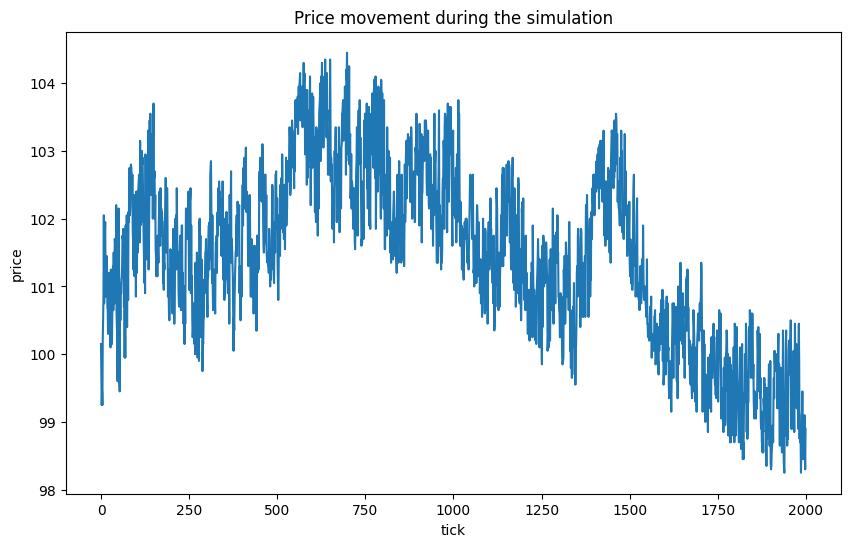

In [6]:
print(' ', '>' * 55, 'Pic. 1', '<' * 55)
plot_price_movement(info)


As we can see on Pic. 1, the price didn't go far away from start price (100) during the simulation. It happened due to the supposed strategy for noise traders, the change of the price could be only explained by the random variable, but not by the previous conditions.

In [7]:
number_of_price_changes(info)

1927

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 2 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


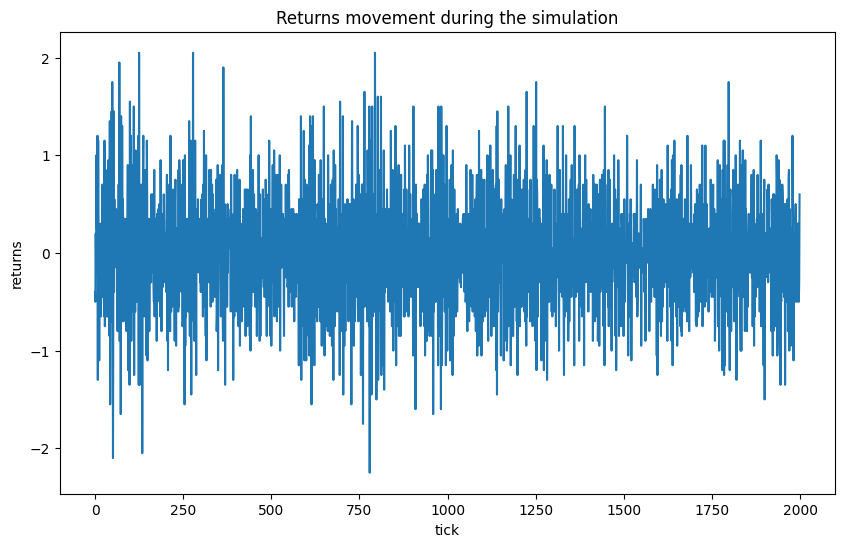

In [13]:
print(' ', '>' * 55, 'Pic. 2', '<' * 55)
plot_returns_movement(info)

During the simulation, price changed more than in 95% of iterations. However, the returns range ins not far - the absolute value of it is not more than 0.03. Therefore, it means that the nature of these times series is not intermittent, however the cnanges of the price are extremely frequent

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 3 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


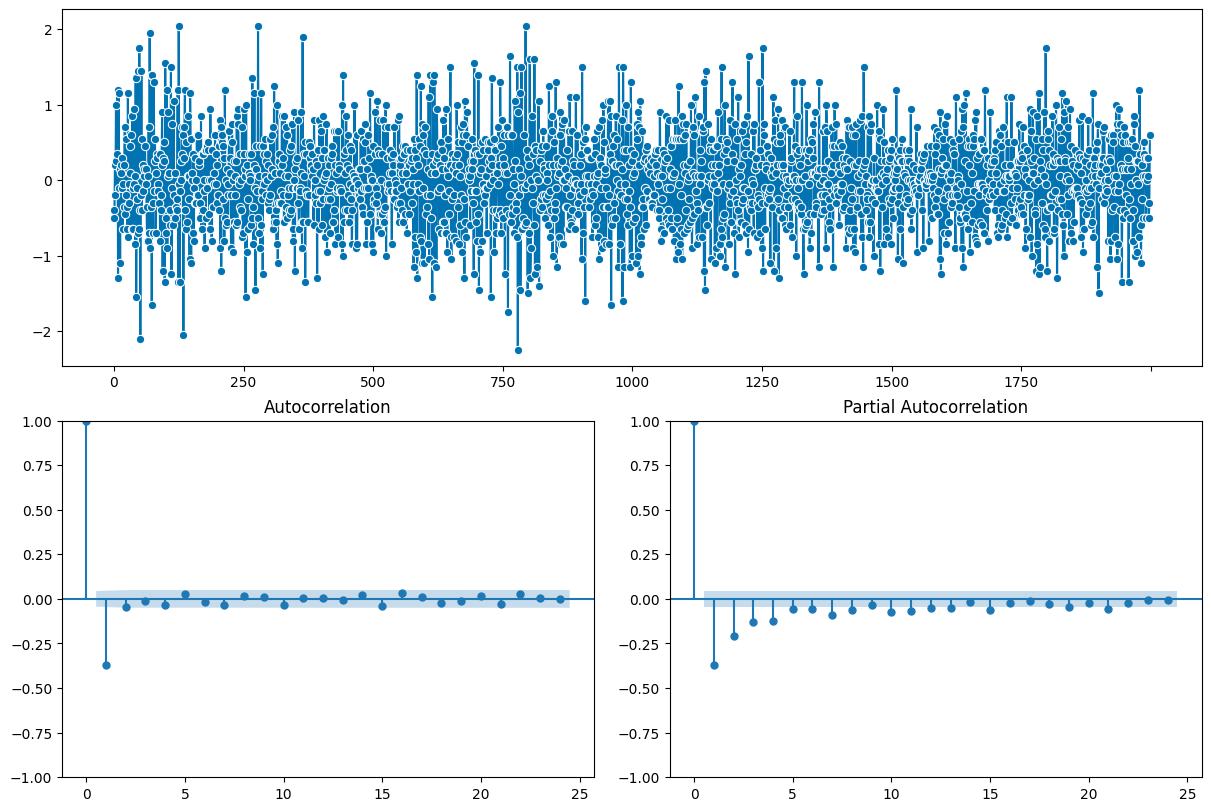

In [14]:
print(' ', '>' * 55, 'Pic. 3', '<' * 55)
plot_correlations_returns(info)

Pic. 2 provides the graph of returns which shows that it's around 0 and the absolute value was never more, than 0.3 at any moment. This leads to think that past returns do not necessarily reflect future performance. 

The stationarity hypothesis gor returns provides following:

For every $\tau$ the joint distribution of returns $r(t_1, T), r(t_2, T), ... ,r(t_k, T)$ is the same as the joint distribution $r(t_1 + \tau, T), r(t_2 + \tau, T), ... ,r(t_k + \tau, T)$


  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 4 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


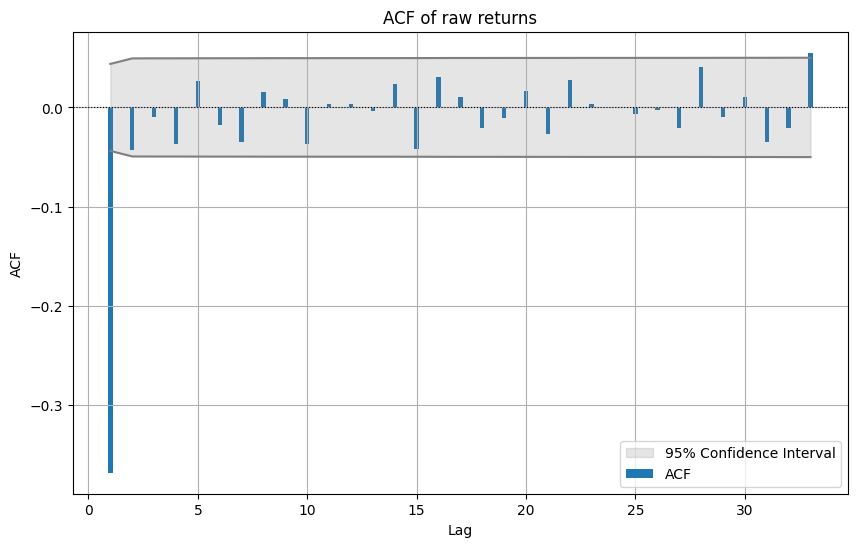

In [15]:
print(' ', '>' * 55, 'Pic. 4', '<' * 55)
plot_raw_returns_autocorrelation(info)

However, Pic. 3 shows, that there is an autocorrelation in price returs. Negative autocorrelation for the first two lags is substantial, and for the third and other lags is under the confidence threshold.

Let's make a Ljung-Box test:

$H_0$: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process).\
${H_a}$: The data are not independently distributed; they exhibit serial correlation.

The Ljung-Box statistics is following:
$$
{\displaystyle Q=n(n+2)\sum _{k=1}^{h}{\frac {{\hat {\rho }}_{k}^{2}}{n-k}}} \sim {\chi _{1-\alpha ,h}^{2}}
$$

In [16]:
obs_value, p_value = ljungbox_test(get_returns(info.prices[list(info.exchanges.keys())[0]]))
print('p_value:', p_value)

p_value: 0.002101006877515283


The hypothesis of independent distribution is rejected (p_value is less than 0.05), that means that there is an autocorrelation in returns

Let's check if returns have a unit root using ADF test.

In [17]:
obs_value, p_value = ADF_test(get_returns(info.prices[list(info.exchanges.keys())[0]]))
print('p_value:', p_value)

p_value: 6.975797485507282e-27


The
Augmented Dickey-Fuller (ADF) test does not reject ( p_value < 0.001) the presence of a unit root within the price series

Kurtosis is less than 3, therefore a stylized fact that returns are leptokurtic. The tails are thinner than the gaussian's. This means that there is far lessen extreme values of returns, than it could be, if the distribution of returns was normal. This is quite logical, because during the simulation, no shocks happened, there is no risk-averse players, the market is full of noise traders, who formally let the price not deviate from the initial price. 

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 5.1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


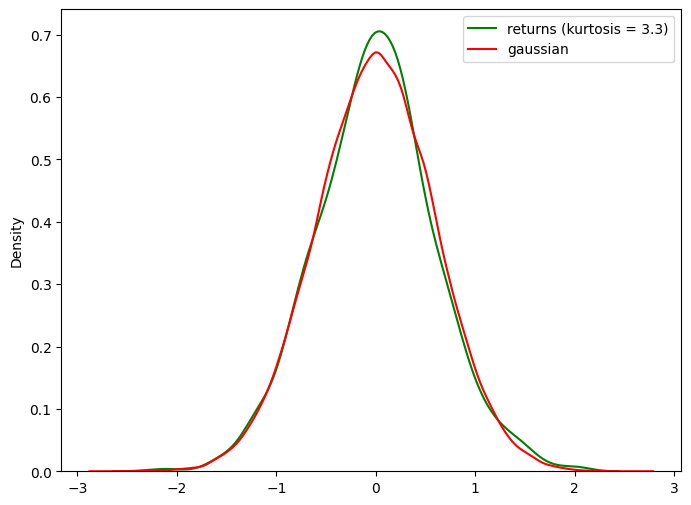

In [18]:
print(' ', '>' * 55, 'Pic. 5.1', '<' * 55)
plot_returns_density(info)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 5.2 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


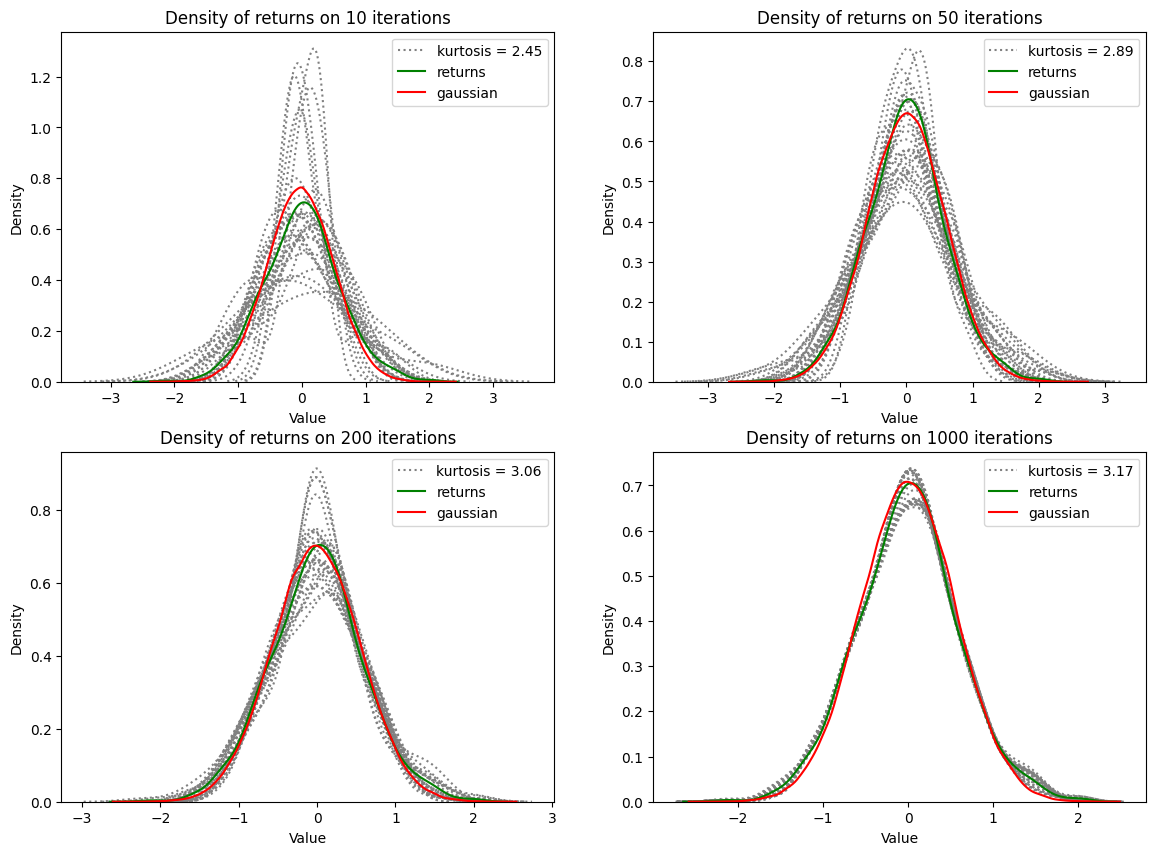

In [19]:
print(' ', '>' * 55, 'Pic. 5.2', '<' * 55)
plot_returns_density_window(info)

The stylized fact that the distribution of returns is becoming more and more like Gaussian distribution appears in the simulation - we can see that on bigger on small window sizes the distribution with the increase of time window size looks more similar to normal. The value of kusrtosis is also rising within the rising the window size to the 3 (like in normal distribution)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 6 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


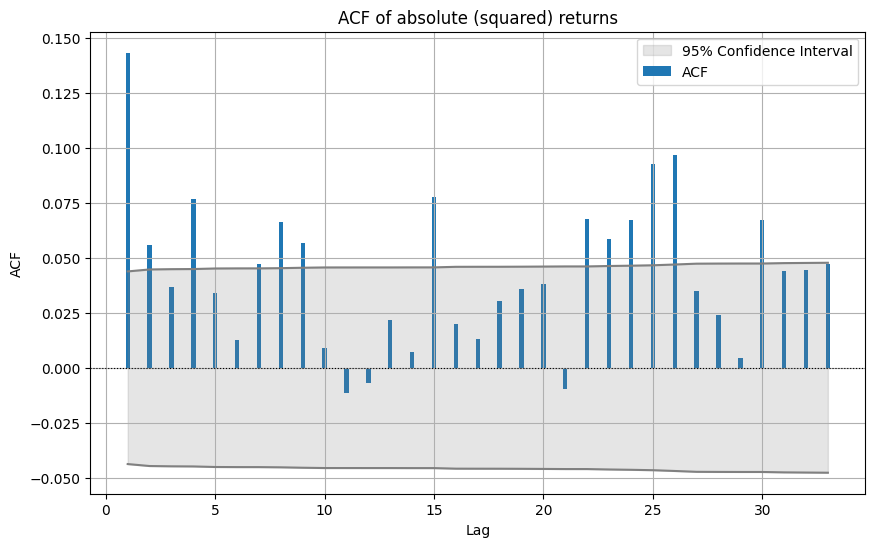

In [29]:
print(' ', '>' * 55, 'Pic. 6', '<' * 55)
plot_absolute_returns_autocorrelation(info)

In [22]:
beta = abs_returns_corr_coeffs(info)[1]
print('beta:', round(beta, 2))

beta: 2.48


Pic. 6 shows that absolute (squared) returns times series is autocorrelated, but only first three lags are signficant (on;y first is more, than 0.1) $\beta$ is very big, therefore there's a big decay of correlation with lags, it means that there is no long-range dependence in returns. Therefore, there's no volatility clustering in this scenario

The graph of absolute value of returns also shows that the magnitude of returns positevely deepends with its previous values. Price very significantly depends fron its previous values

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 7 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


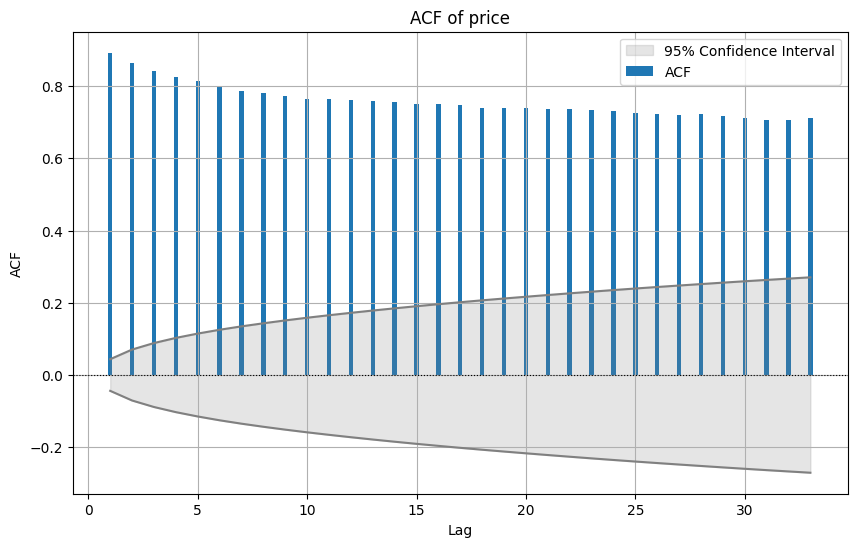

In [23]:
print(' ', '>' * 55, 'Pic. 7', '<' * 55)
plot_price_autocorrelation(info)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 8 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


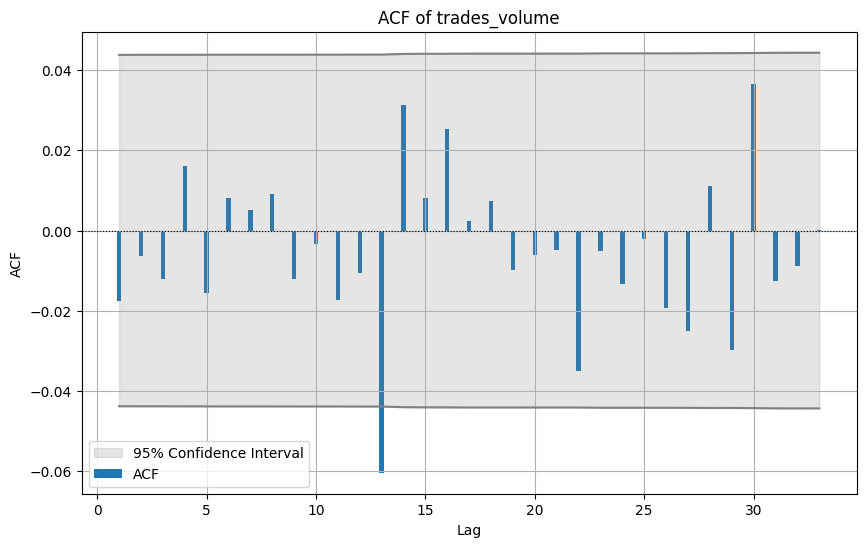

In [24]:
print(' ', '>' * 55, 'Pic. 8', '<' * 55)
plot_trade_volume_autocorrelation(info)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 9 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


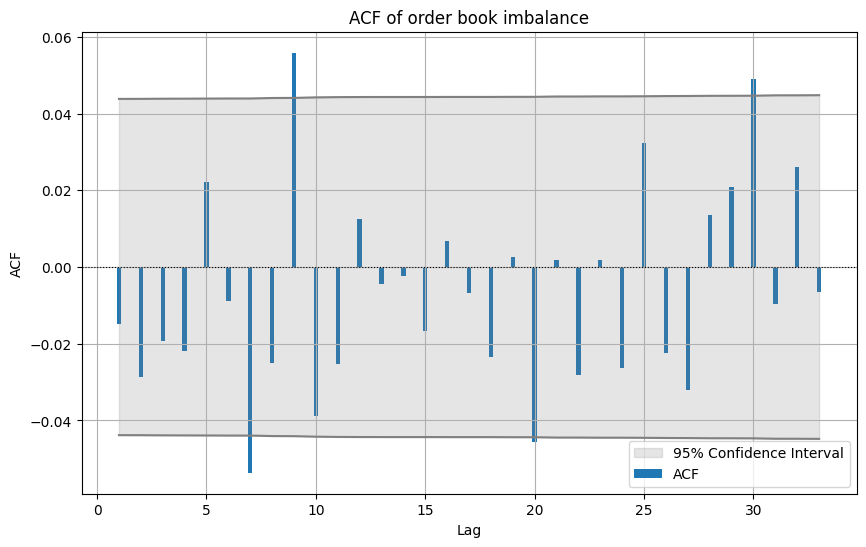

In [25]:
print(' ', '>' * 55, 'Pic. 9', '<' * 55)
plot_orderbook_imbalance_atocorrelation(info)

The plot of trades volume's (Pic. 7) shows that there is no approximatally no correlation between volumes during the time period. Also there is no autocorrelation in order book imbalance times series (Pic. 8). This leads to the fact that the stylized fact about the endogeneity of trade execution times is not fulfilled; trade execution times are not autocorrelated

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 10 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


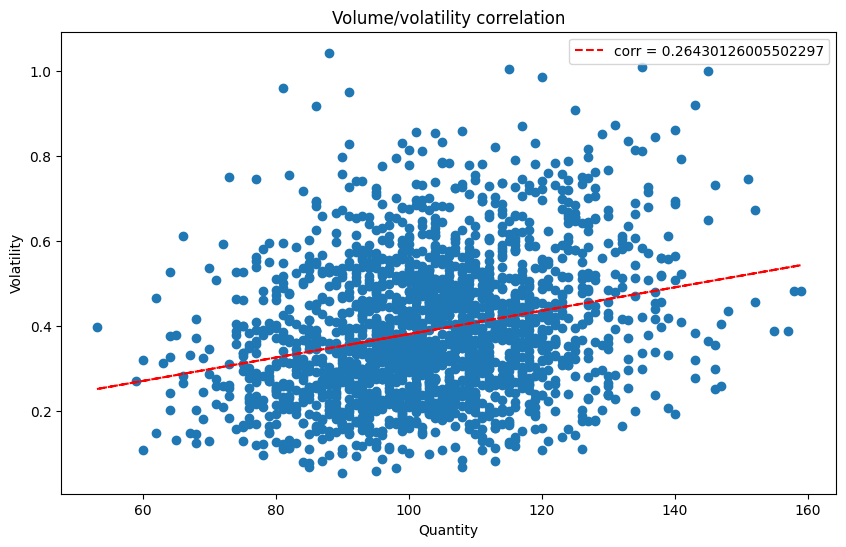

In [26]:
print(' ', '>' * 55, 'Pic. 10', '<' * 55)
plot_volume_volatility_correlation(info)

There's a positive correlation between volatility and traded volume quantity

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 11 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


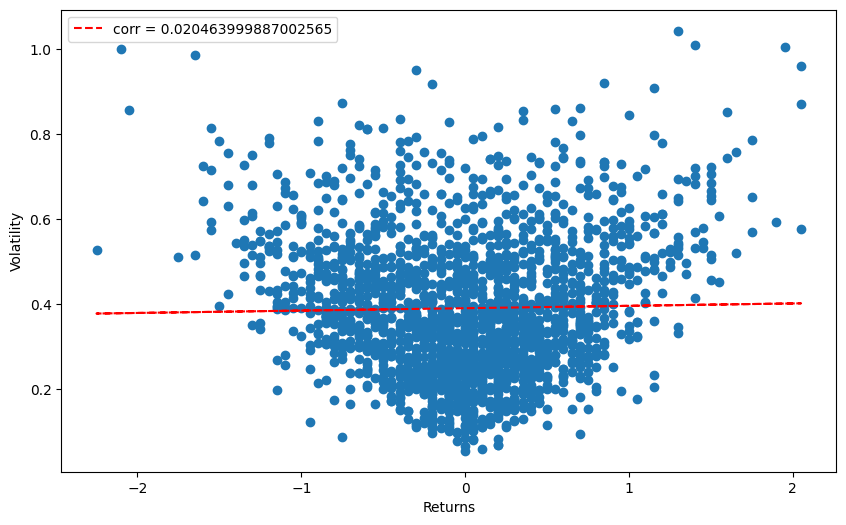

In [27]:
print(' ', '>' * 55, 'Pic. 11', '<' * 55)
plot_raw_returns_volatility_correlation(info)

Volatility and returns doesn't correlate, because traders' decisions of making orders don't depend on market's conditions. The hypothesis of connection of price drop with high volatility is not fullfilled 

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 12 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


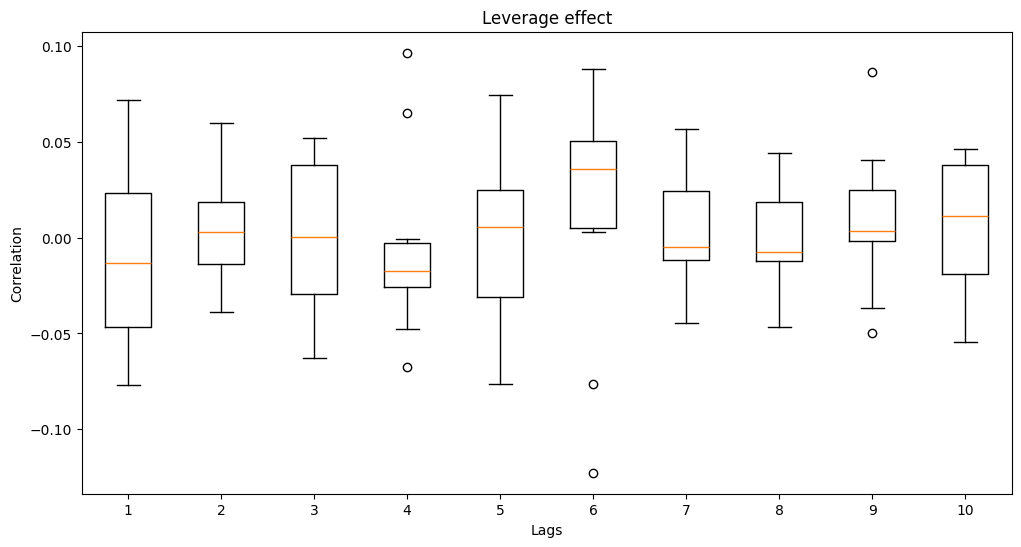

In [28]:
print(' ', '>' * 55, 'Pic. 12', '<' * 55)
plot_leverage_effect(infos)

### __Results:__

The value of correlation between returns and volatility is about to zero on any lag


1. There is an autocorrelation in the returns, the factor notiecably negatively correlates with its two previous values - the changes cannot be explained only with randon variable.

2. Distribution of returns is similar to normal distribution - the value of kurtosis roughly equal to gaussian's.
3. Price changes after nearly every iteration, the degree of variability of returns is not high.
4. The magnitude of returns significantly correlates only with a couple of lags, the decay coefficient is very big - high-voltility clustering in time isn't possible.
5. There is no dependence between volatility and raw returns on different lags - the leverage effect is absent in the simulation
6. Trading volume and volatility are positively correlated - the stylized fact is performed. -yes
7. The distribution of returns slowly approaches gaussian with the increase of window size. -yes
8. There is no long-range dependance in the magnitude of returns. -no
9. Durations between subsequent trades is exogenous and not autocorrelated. -yes

| Num| Stylized Fact | Noise Traders | Fundamentalists & Chartists | 
|------------- | ------------- | ------------- | ------------- |
| 1   | No returns autocorrelation  | &check;  | 
| 2   |Leptokurtik returns | &cross;  |
| 3   |Frequent price changes | &check;  |
| 4   |Volatility clustering| &cross;  |
| 5   |Leverage effect | &cross;  |
| 6   |Volume and volatility positively correlate | &check;  |
| 7   |Aggregational Gaussianity | &cross;  |
| 8   |Long range dependence of absolute returns | &cross; |
| 9   |Autocorrelation of durations between subsequent trades | &cross;


### Extra: Noisy traders - Market events

_Let's observe stylized facts about an efficient financial market with the same fill of noise traders at various events occurring in it_

#### 1. Price shock

First two events are the shocks of the price, the initial raise and drop of it around of 20%.

In [6]:
info_price_shock_up = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0, event = 'MarketPriceShockUp')
info_price_shock_down = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0, event = 'MarketPriceShockDown')

Simulation: 100%|██████████| 10000/10000 [03:01<00:00, 55.14it/s] 


In [4]:
infos_price_shock_up = []
for _ in range(10):
    infos_price_shock_up.append(make_simulation(n_random = 200, n_fundamentalist=0, n_chartist=0, n_marketmaker=0, n_iters=4000, event = 'MarketPriceShockUp'))
    clear_output()

In [5]:
infos_price_shock_down = []
for _ in range(10):
    infos_price_shock_down.append(make_simulation(n_random = 200, n_fundamentalist=0, n_chartist=0, n_marketmaker=0, n_iters=4000, event = 'MarketPriceShockDown'))
    clear_output()

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


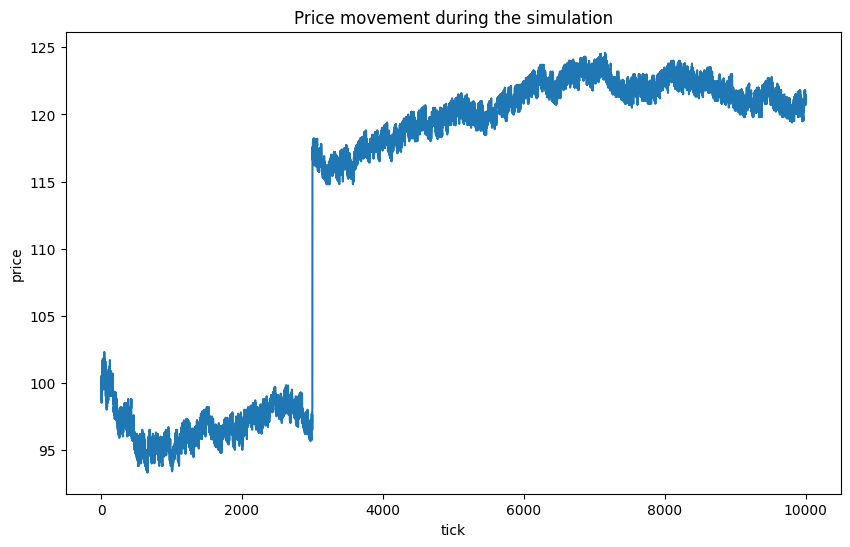

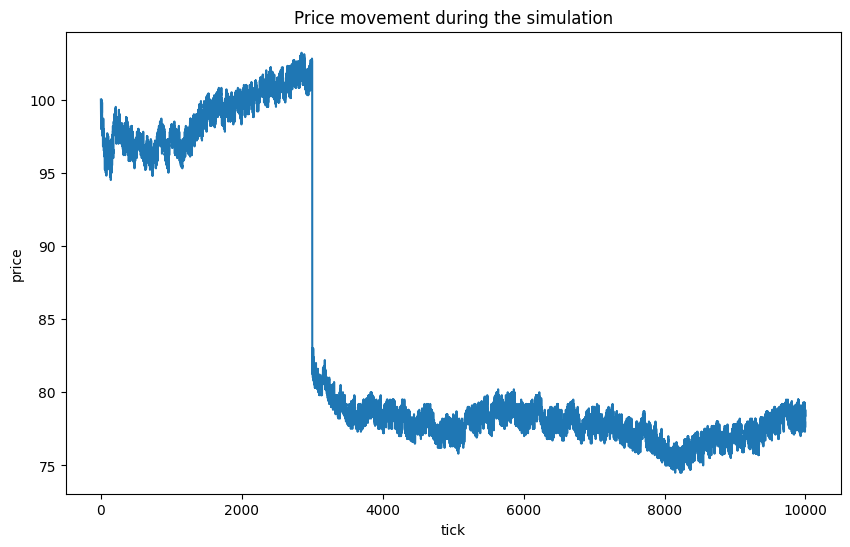

In [8]:
print(' ', '>' * 55, 'Pic. 1', '<' * 55)
plot_price_movement(info_price_shock_up)
plot_price_movement(info_price_shock_down)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 2 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


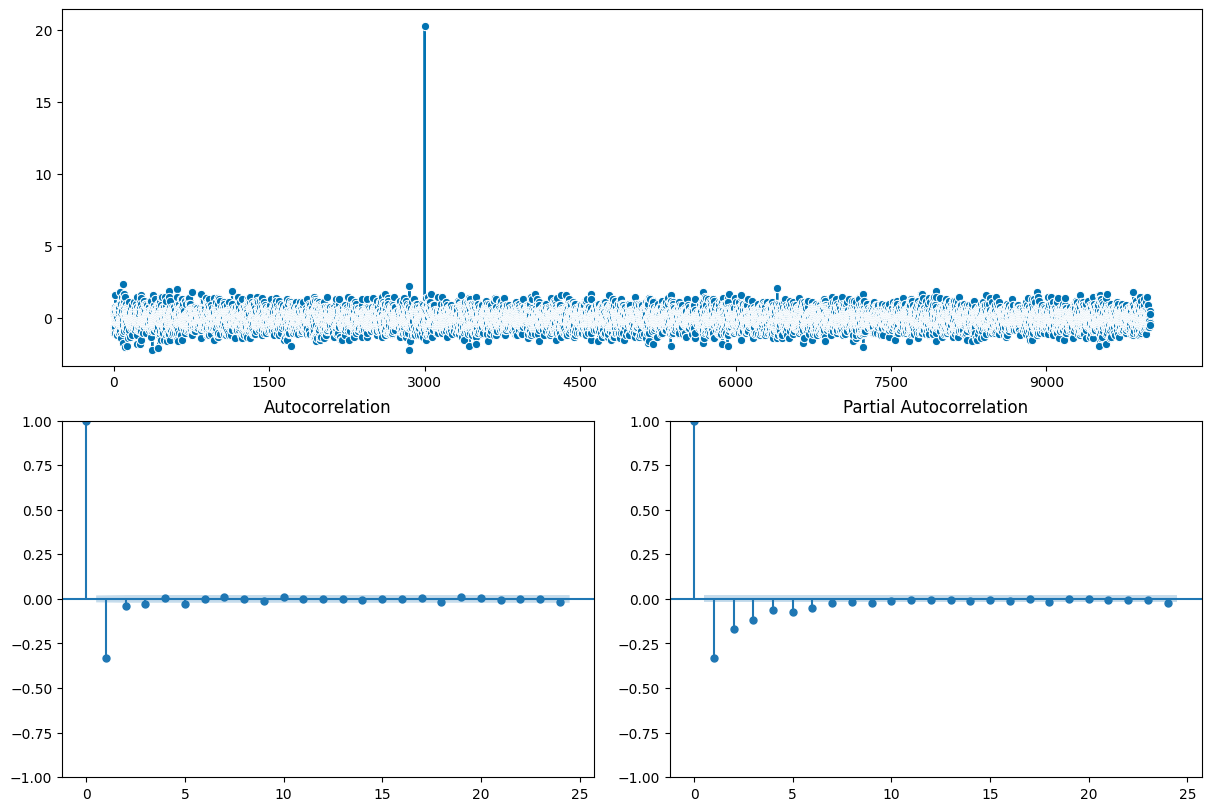

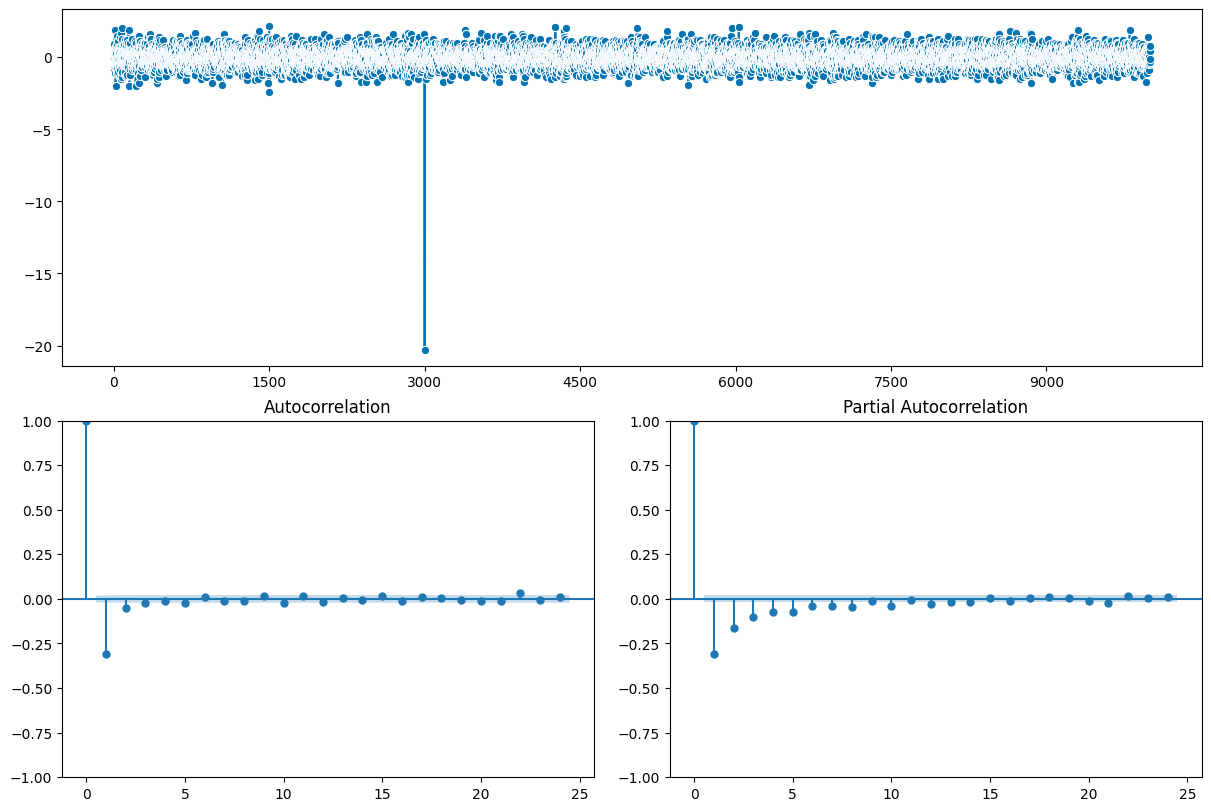

In [9]:
print(' ', '>' * 55, 'Pic. 2', '<' * 55)
plot_correlations_returns(info_price_shock_up)
plot_correlations_returns(info_price_shock_down)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 3.1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


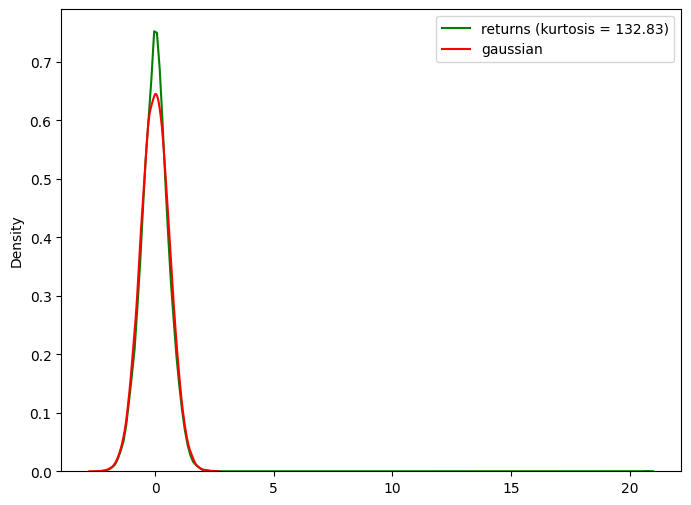

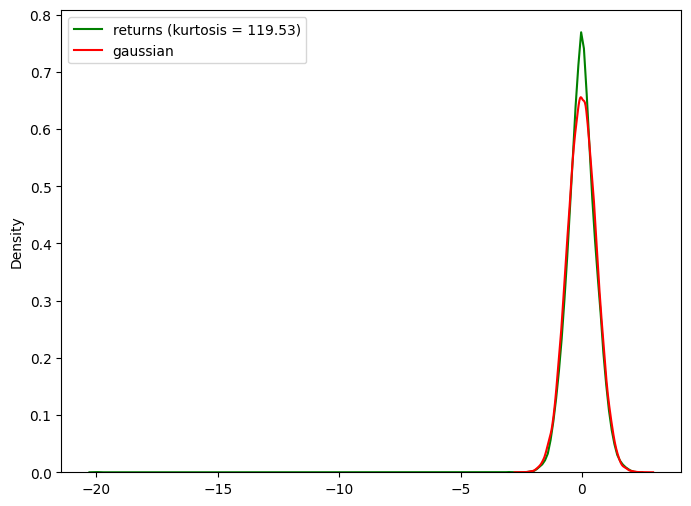

In [7]:
print(' ', '>' * 55, 'Pic. 3.1', '<' * 55)
plot_returns_density(info_price_shock_up)
plot_returns_density(info_price_shock_down)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 3.2 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


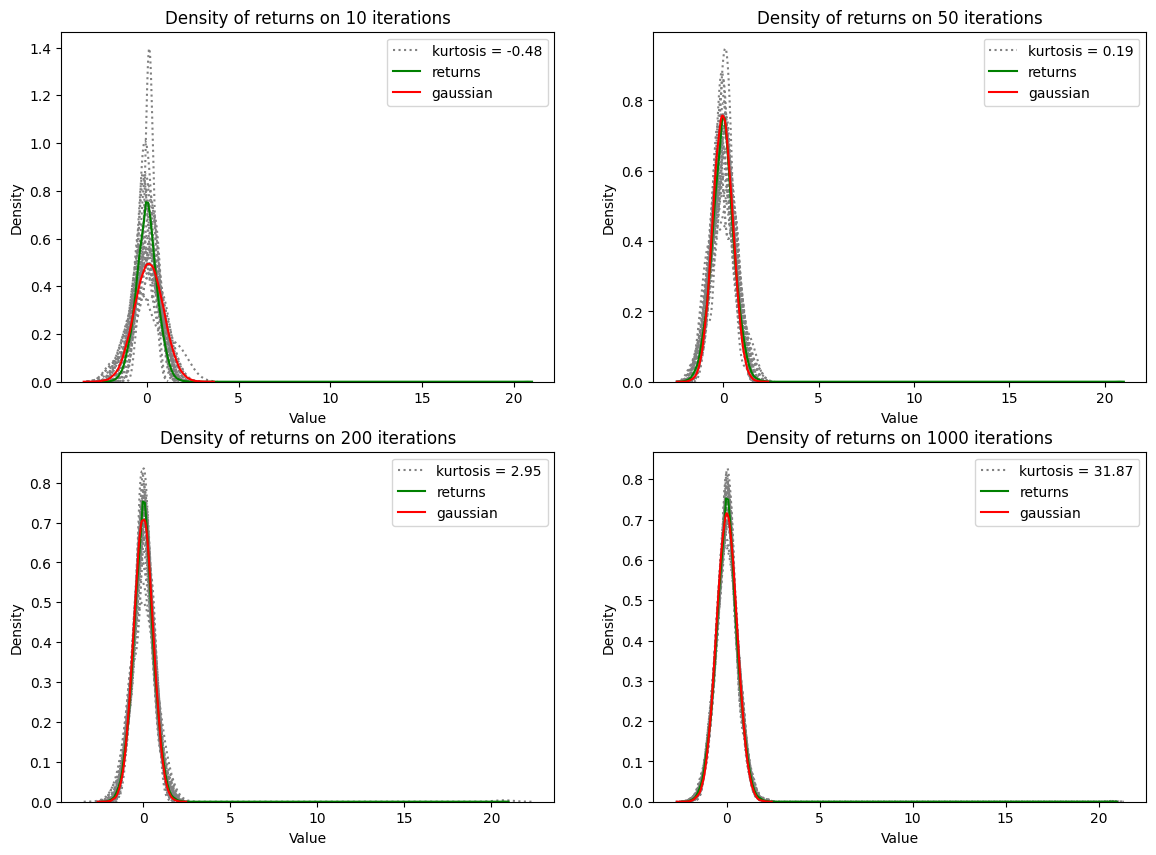

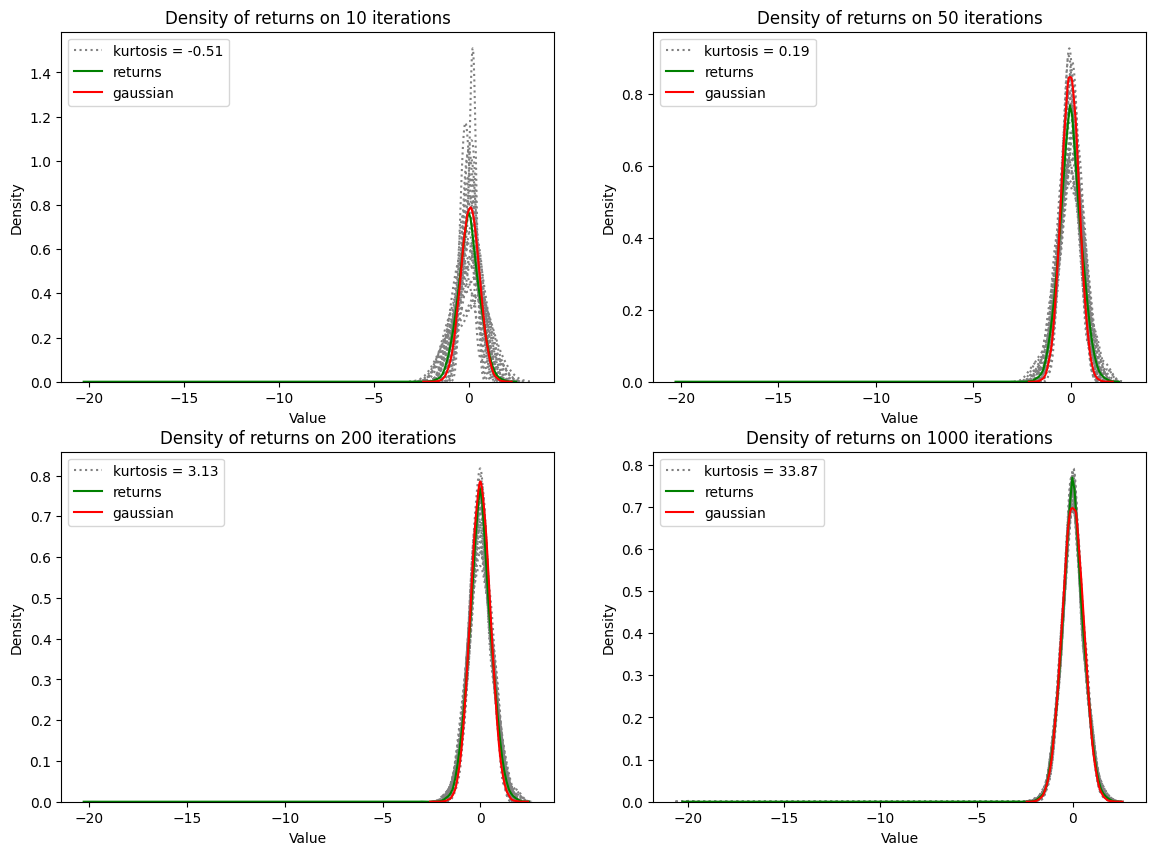

In [8]:
print(' ', '>' * 55, 'Pic. 3.2', '<' * 55)
plot_returns_density_window(info_price_shock_up)
plot_returns_density_window(info_price_shock_down)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 4 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


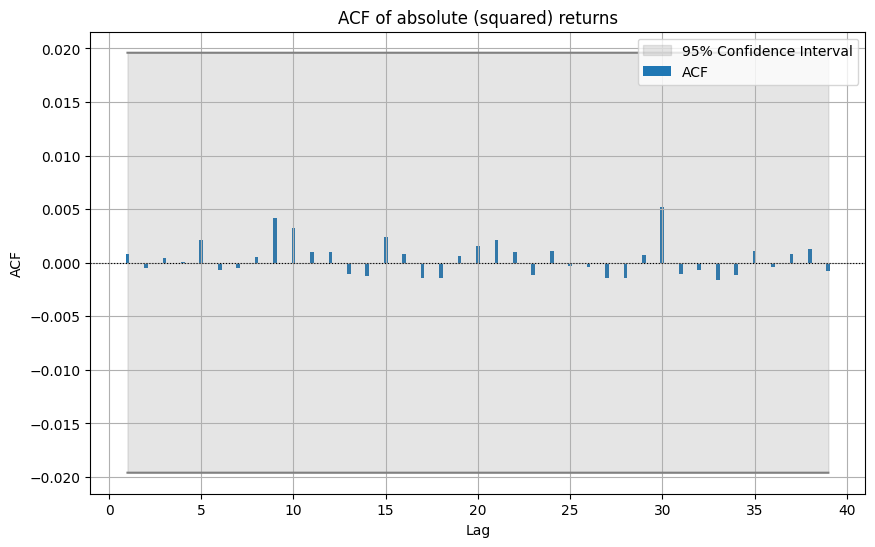

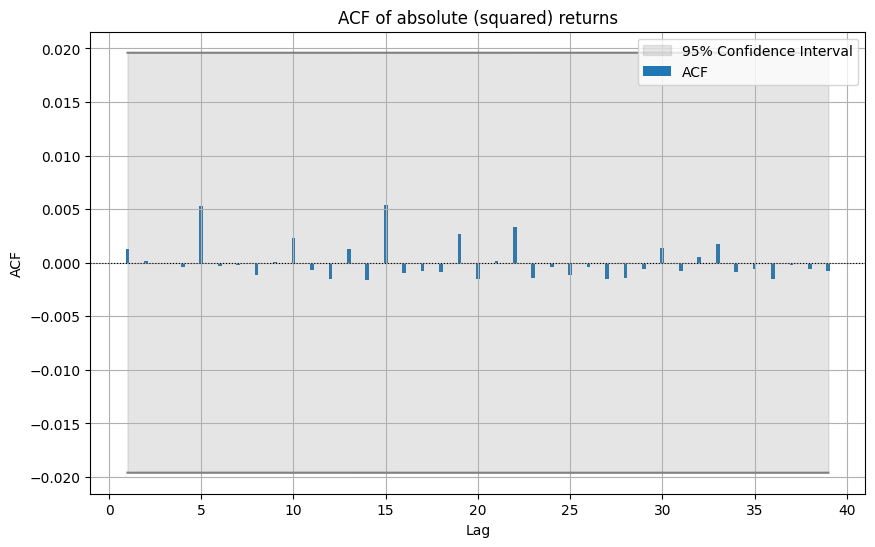

In [11]:
print(' ', '>' * 55, 'Pic. 4', '<' * 55)
plot_absolute_returns_autocorrelation(info_price_shock_up)
plot_absolute_returns_autocorrelation(info_price_shock_down)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 5 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


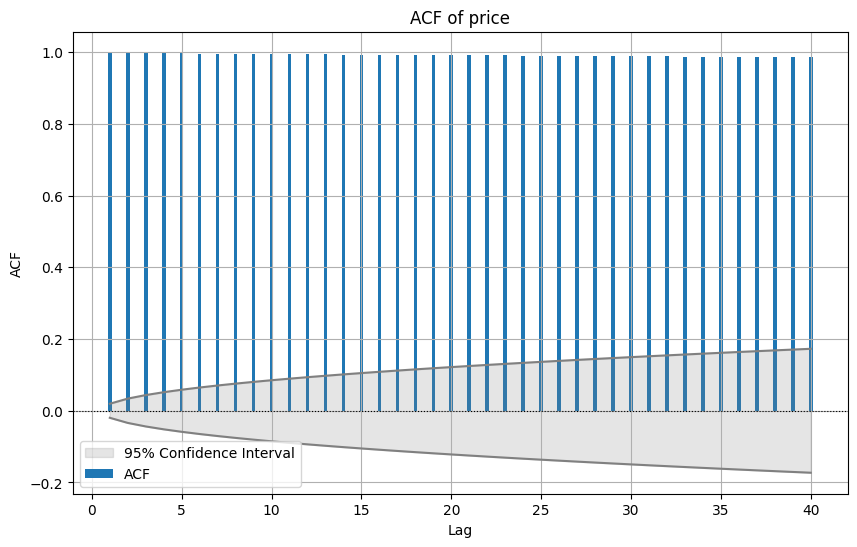

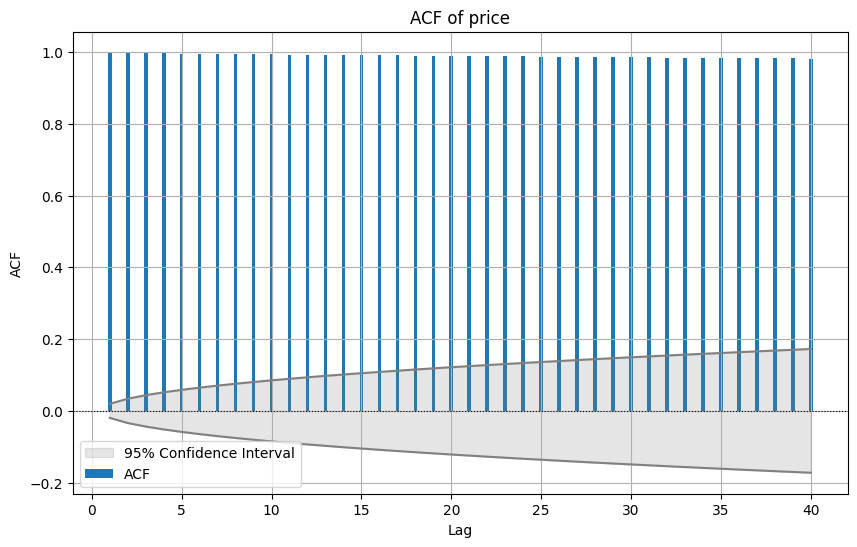

In [12]:
print(' ', '>' * 55, 'Pic. 5', '<' * 55)
plot_price_autocorrelation(info_price_shock_up)
plot_price_autocorrelation(info_price_shock_down)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 6 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


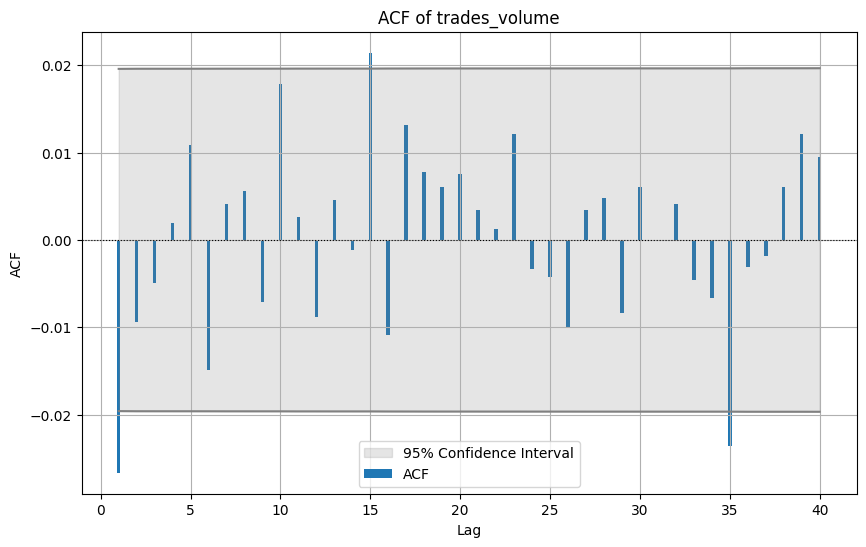

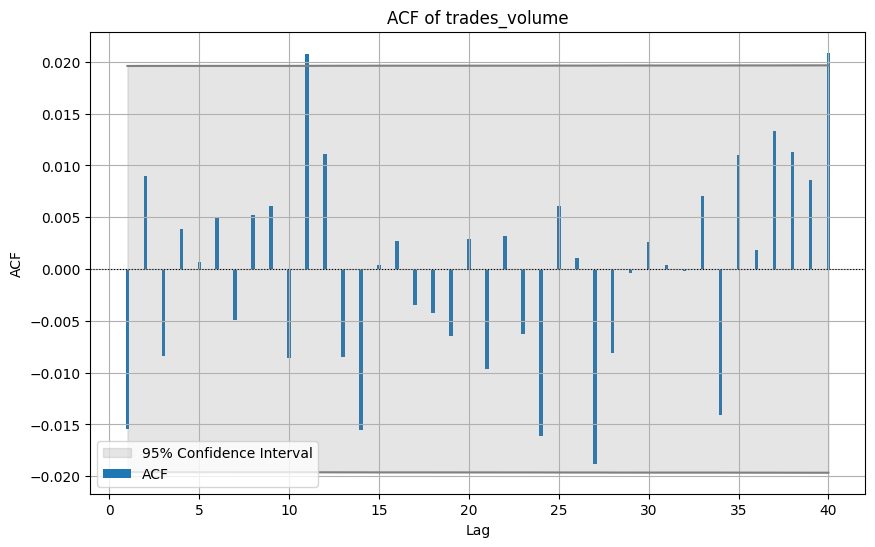

In [13]:
print(' ', '>' * 55, 'Pic. 6', '<' * 55)
plot_trade_volume_autocorrelation(info_price_shock_up)
plot_trade_volume_autocorrelation(info_price_shock_down)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 7 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


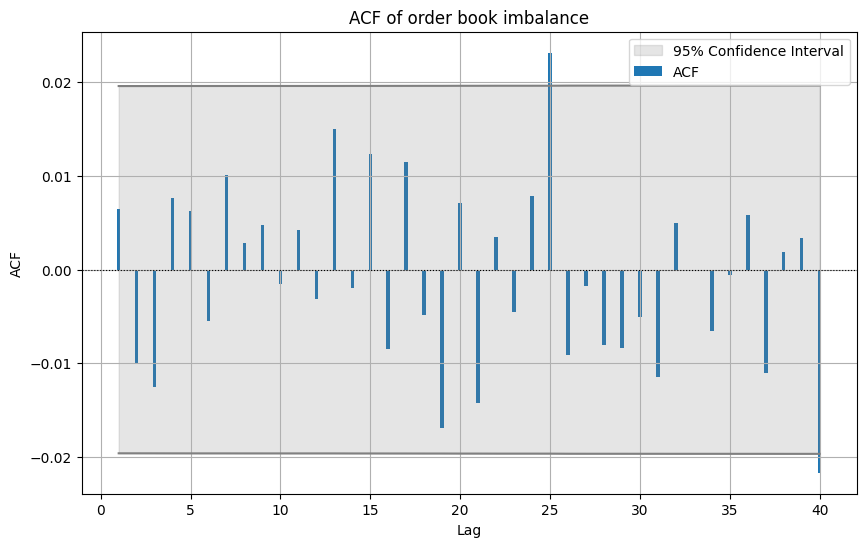

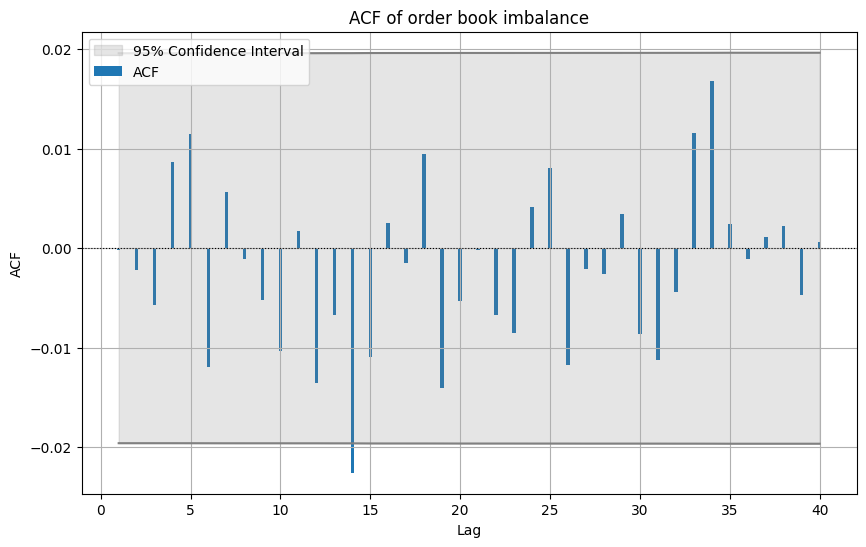

In [14]:
print(' ', '>' * 55, 'Pic. 7', '<' * 55)
plot_orderbook_imbalance_atocorrelation(info_price_shock_up)
plot_orderbook_imbalance_atocorrelation(info_price_shock_down)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 8 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


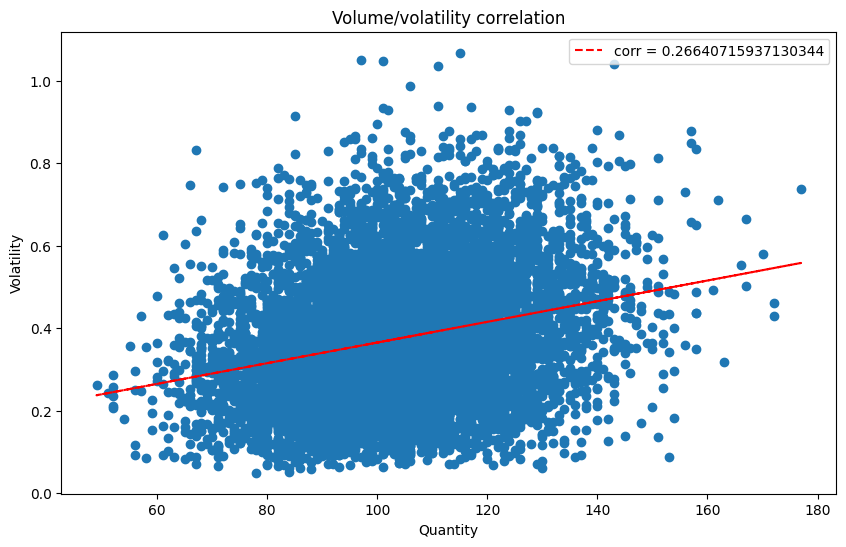

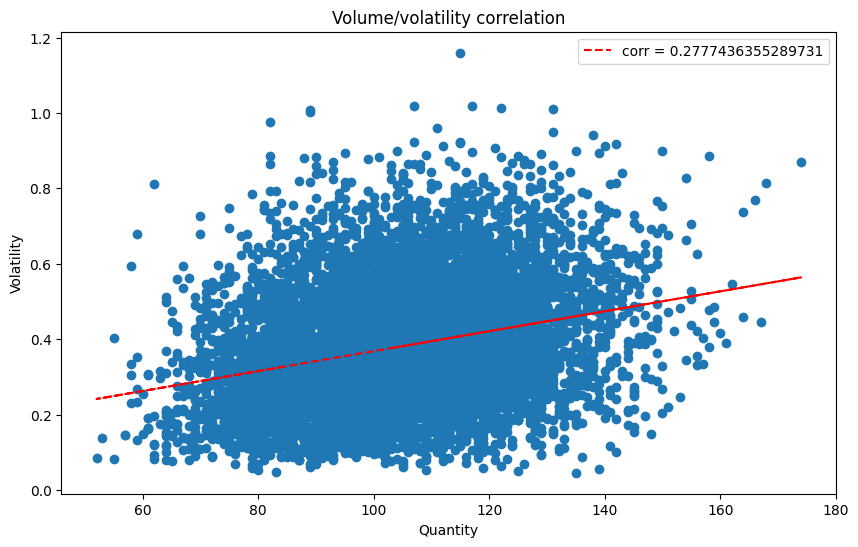

In [15]:
print(' ', '>' * 55, 'Pic. 8', '<' * 55)
plot_volume_volatility_correlation(info_price_shock_up)
plot_volume_volatility_correlation(info_price_shock_down)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 9 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


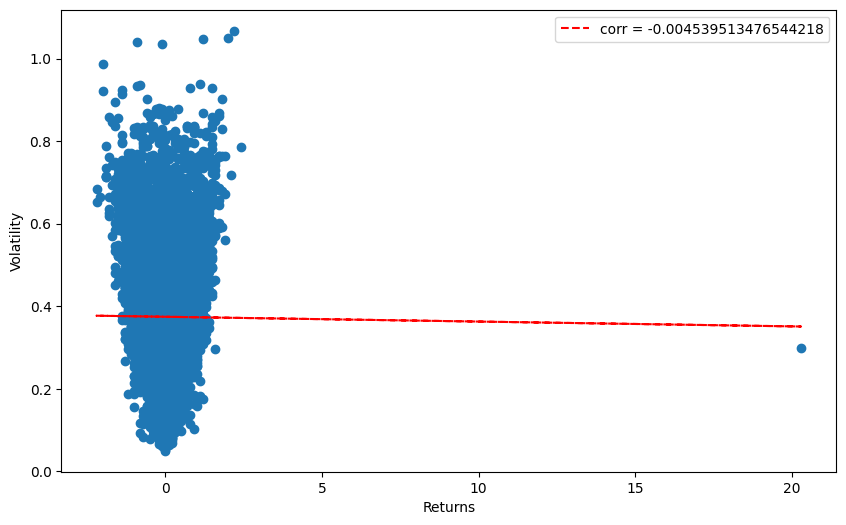

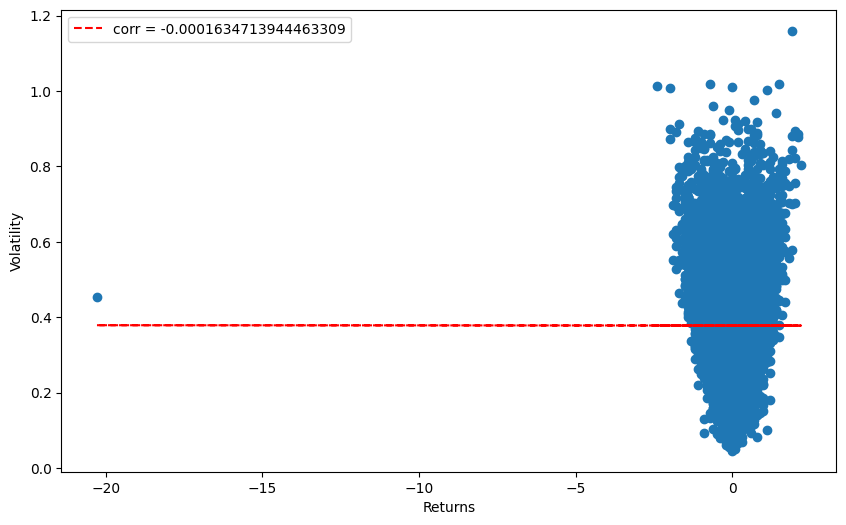

In [18]:
print(' ', '>' * 55, 'Pic. 9', '<' * 55)
plot_raw_returns_volatility_correlation(info_price_shock_up)
plot_raw_returns_volatility_correlation(info_price_shock_down)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 9 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


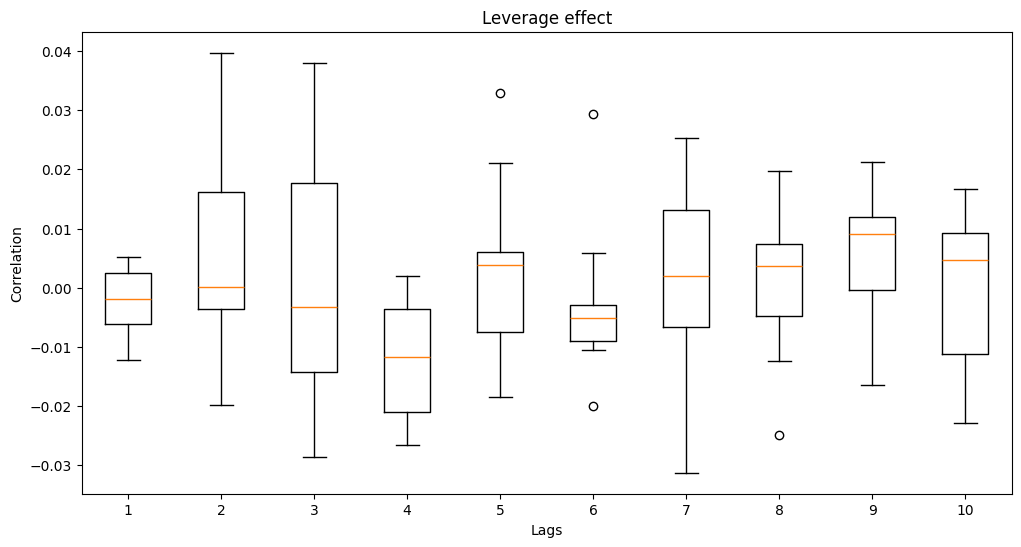

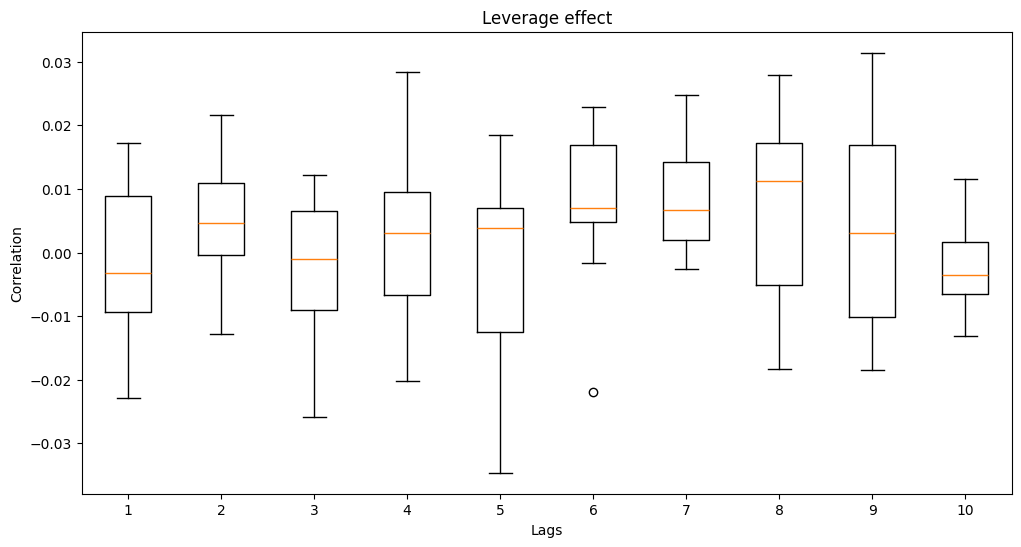

In [16]:
print(' ', '>' * 55, 'Pic. 10', '<' * 55)
plot_leverage_effect(infos_price_shock_up)
plot_leverage_effect(infos_price_shock_down)

##### __Results__:
1. Raw returns are correlated only on first lag, other lags correlations are not significant

2. The distribution of returns is leptokurtic - mostly it's made by one price change
3. Frequent price changes
4. No signifcant autocorrelation of absolute returns
5. No correlation between raw returns and volatility
6. Trading volume and volatility have positive correlation
7. The distribution of returns approaches gaussian with as the window size grows
8. No long-range dependence of magnitude returns
9. Duration of subsequent trades is not autocorrelated

#### 2. MarketMaker in

What if Market Maker comes to the market, full of noisy traders

__Ряд не стационарен, надо переделать__

In [9]:
info_marketmaker_in = make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0, event = 'MarketMakerIn')

Simulation: 100%|██████████| 10000/10000 [09:42<00:00, 17.17it/s] 


  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


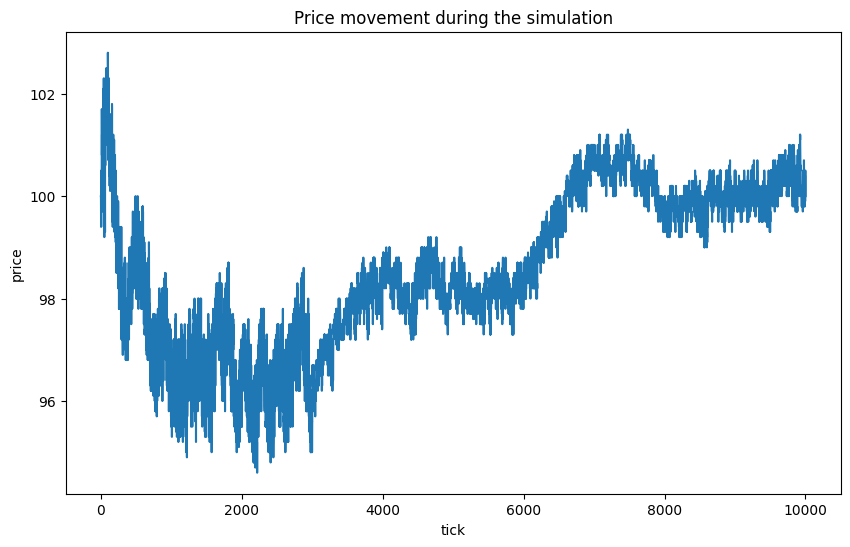

In [20]:
print(' ', '>' * 55, 'Pic. 1', '<' * 55)
plot_price_movement(info_marketmaker_in)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 2 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


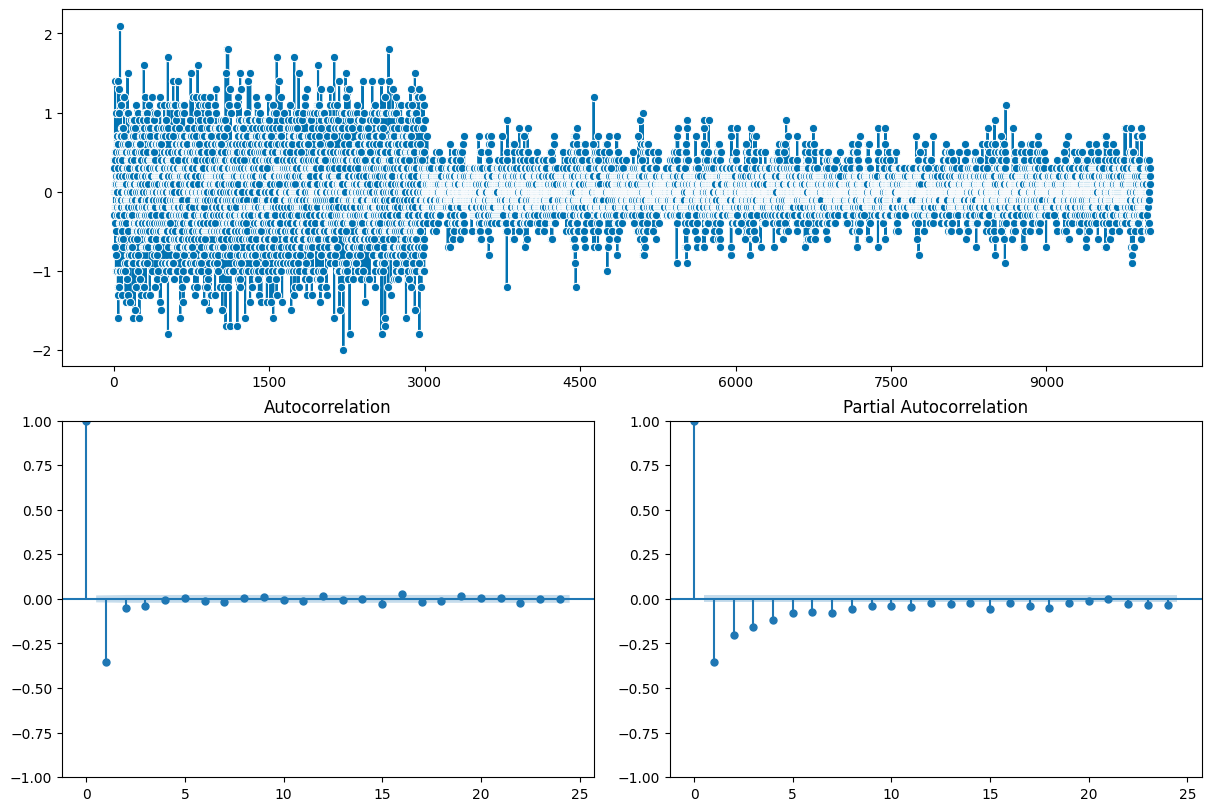

In [21]:
print(' ', '>' * 55, 'Pic. 2', '<' * 55)
plot_correlations_returns(info_marketmaker_in)

The value of returns' volatility significantly dicreased after marketmaker came into the market

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 3.1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


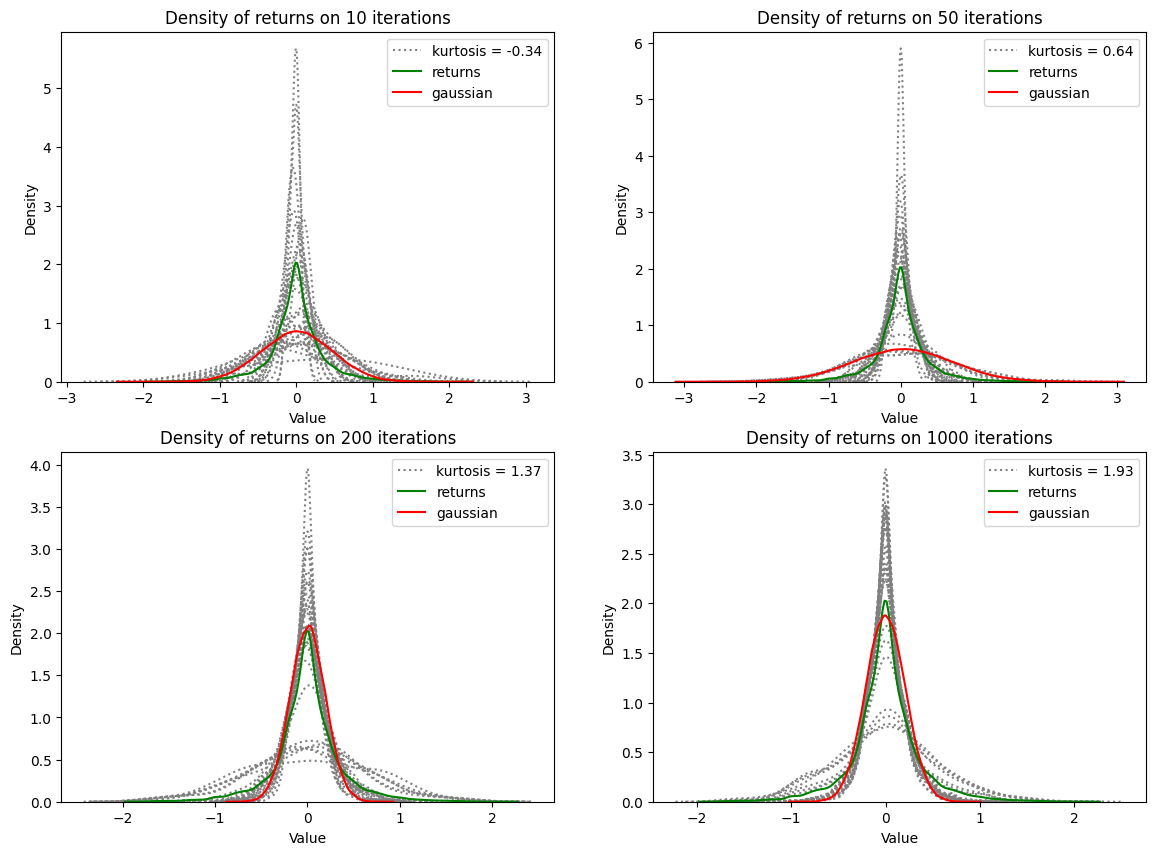

In [10]:
print(' ', '>' * 55, 'Pic. 3.1', '<' * 55)
plot_returns_density_window(info_marketmaker_in)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 3.2 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


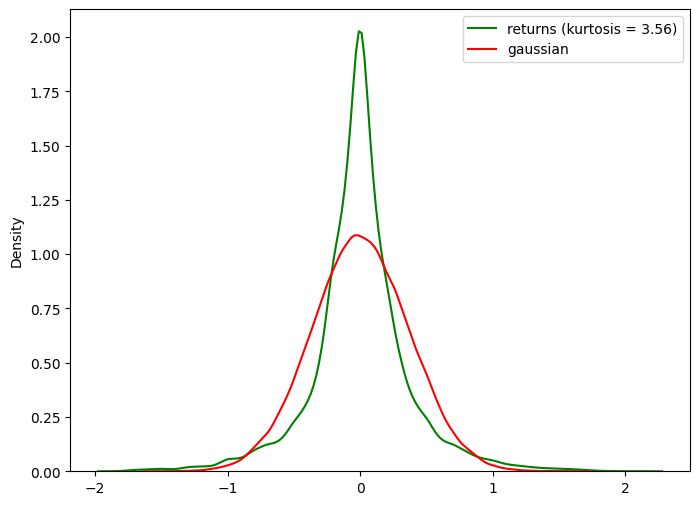

In [11]:
print(' ', '>' * 55, 'Pic. 3.2', '<' * 55)
plot_returns_density(info_marketmaker_in)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 4 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


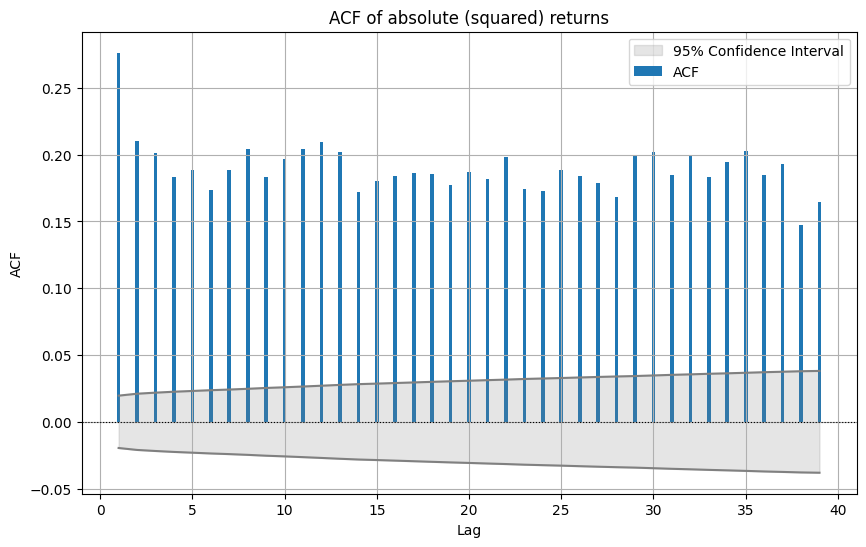

In [23]:
print(' ', '>' * 55, 'Pic. 4', '<' * 55)
plot_absolute_returns_autocorrelation(info_marketmaker_in)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 5 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


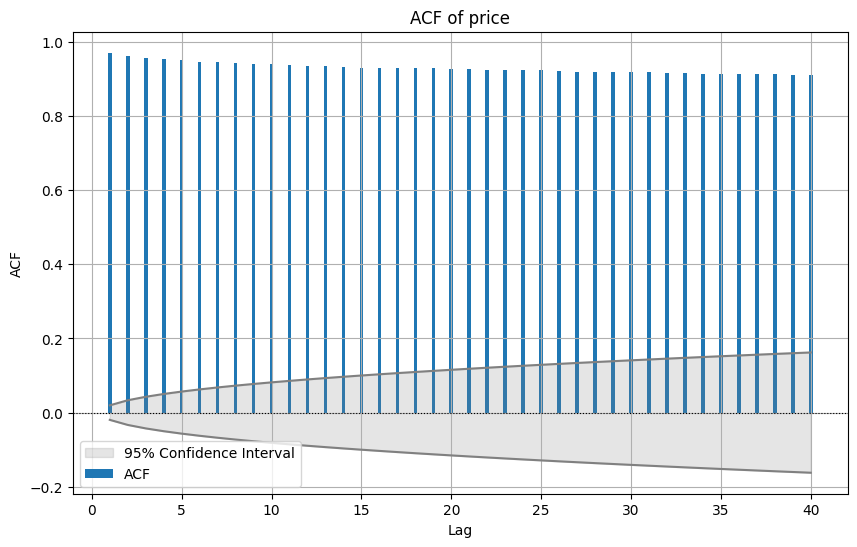

In [24]:
print(' ', '>' * 55, 'Pic. 5', '<' * 55)
plot_price_autocorrelation(info_marketmaker_in)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 6 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


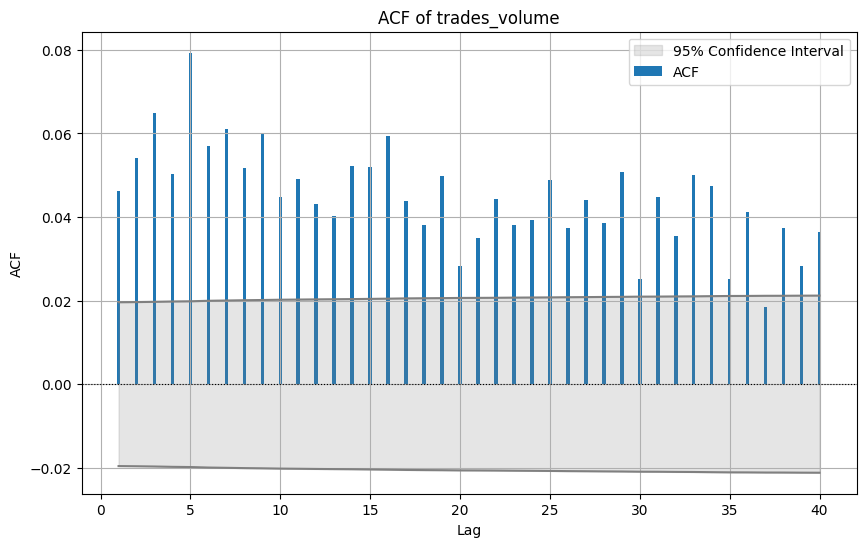

In [25]:
print(' ', '>' * 55, 'Pic. 6', '<' * 55)
plot_trade_volume_autocorrelation(info_marketmaker_in)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 7 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


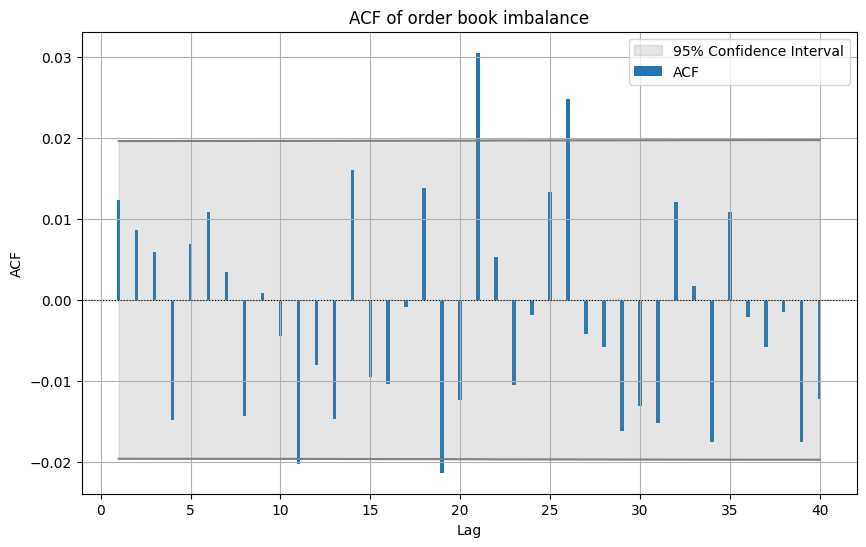

In [26]:
print(' ', '>' * 55, 'Pic. 7', '<' * 55)
plot_orderbook_imbalance_atocorrelation(info_marketmaker_in)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 8 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


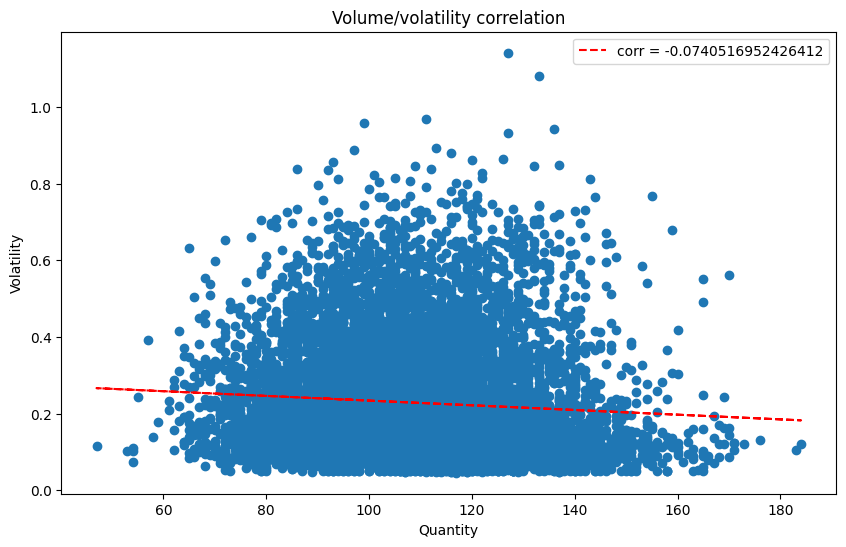

In [27]:
print(' ', '>' * 55, 'Pic. 8', '<' * 55)
plot_volume_volatility_correlation(info_marketmaker_in)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 9 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


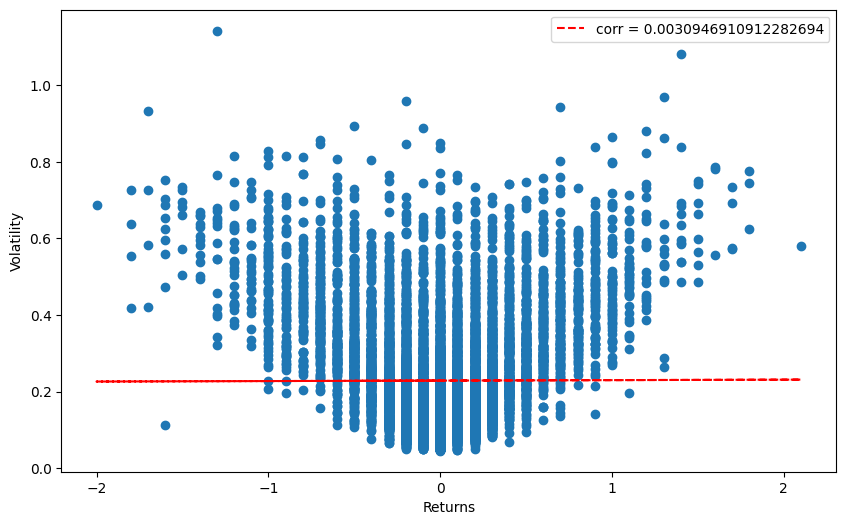

In [28]:
print(' ', '>' * 55, 'Pic. 9', '<' * 55)
plot_raw_returns_volatility_correlation(info_marketmaker_in)

In [ ]:
info_marketmaker_ins = []
for _ in range(10):
    info_marketmaker_ins.append(make_simulation(n_random = 200, n_fundamentalist = 0, n_chartist = 0, n_marketmaker = 0, n_iters = 4000, event = 'MarketMakerIn'))
    clear_output()

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 10 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


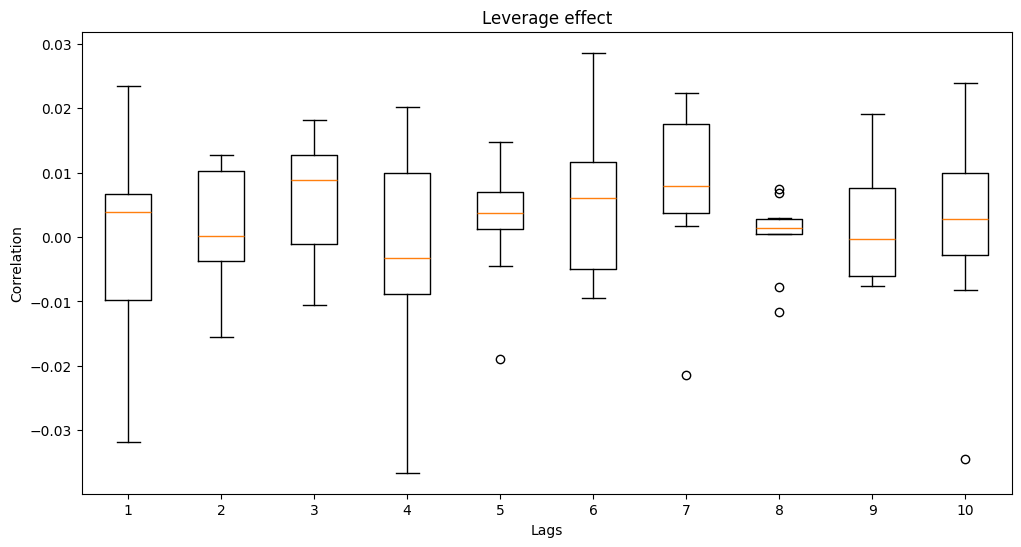

In [4]:
print(' ', '>' * 55, 'Pic. 10', '<' * 55)
plot_leverage_effect(info_marketmaker_ins)

##### __Results__:
1. Raw returns are correlated only on first lag, other lags correlations are not significant

2. The distribution of returns is playkurtic
3. Frequent price changes
4. Long-range autocorrelation of absolute returns 
5. No correlation between raw returns and volatility on different lags
6. Trading volume and volatility have negative correlation
7. The distribution of returns approaches gaussian with as the window size grows
8. No long-range dependence of magnitude returns
9. Duration of subsequent trades is autocorrelated

## 2. Chartists vs Fundamenalists

In this section we will investigate effects on the market caused by the interplay of fundamentalists and chartists.\ 

Fundamentalist traders take into account the fundamental price of the asset and perform an activity when the value deviates from fundamental (buy the asset, if it is undervaluated and sell if it is overvaluated), as they believe that price will quickly revert to it's fundamental value. Fundamentalist make their decision according to:
- risk free rate
- fundamental price
- the number of known future dividends
- spread 
- transaction cost

The value of fundamental price is calculated using Dividend Discount Model (DDM):
$$
\text{Fundamental Price} = \text{Perpetual Payments} + \text{Known Dividends} \\
$$
$$
\text{Perpetual Payments} = \frac{\text{Last Known Dividends}}{r(1+r)^{n-1}} \quad \quad \quad 
 \text{Known Dividends} = \sum\limits_{i = 0}^{n - 2}\frac{\text{dividends}_i}{(1+r)^{i + 1}} \\
$$
$
\text{where}: \\ 
r - \text{risk free rate} \\
n - \text{known dividends periods} \\
$

The amount of order is calculated the following way:
$$
\text{Q} = \min{(5, \frac{|\text{fp} - \text{p}|}{\text{p}}\cdot \frac{1}{\gamma})}
$$

$
\text{where}: \\ 
\text{fp} - \text{Fundamental Price} \\
\text{p} - \text{Market Price} \\
\gamma - \text{dependency coefficient} \ (= 5\cdot 10^{-3})
$

This order volume formula correlates with the theory, because when the market price deviation from the fundamental price is large, the fundamentalist's desire to place a higher order than when the distance is smaller

In [57]:
info = make_simulation(n_random = 0, n_fundamentalist = 100, n_chartist = 100, n_marketmaker = 0)

Simulation: 100%|██████████| 2000/2000 [00:19<00:00, 101.65it/s]


In [24]:
infos = []
for _ in range(20):
    infos.append(make_simulation(n_random = 0, n_fundamentalist = 100, n_chartist = 100, n_marketmaker = 0, n_iters = 500))
    clear_output()

### Analyze

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


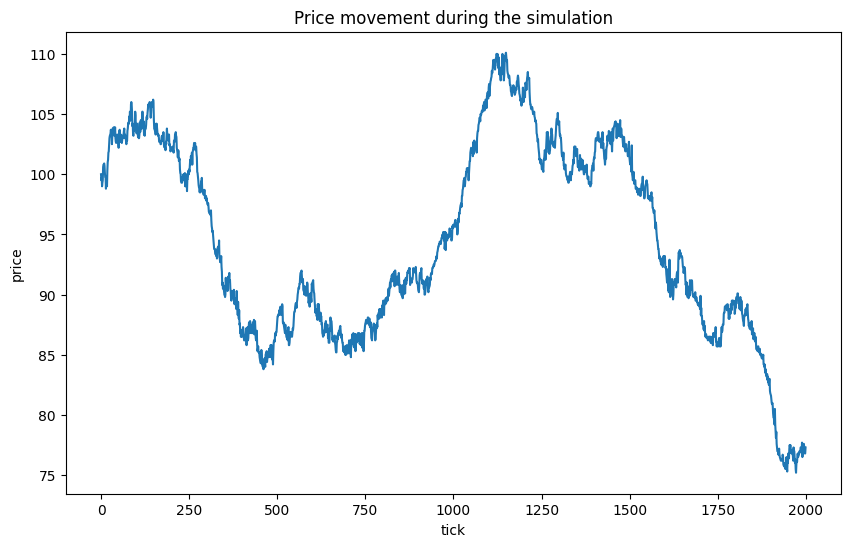

In [58]:
print(' ', '>' * 55, 'Pic. 1', '<' * 55)
plot_price_movement(info)

In [59]:
number_of_price_changes(info)

1772

In [60]:
number_of_returns_changes(info)

1928

Number of price changes is around 89% which is less, than in NT scenario, but the price process is far less noisy and the jumps and drops of price happens more frequently and with a bigger amplitude. Also price changes are more centred around fundamental price 

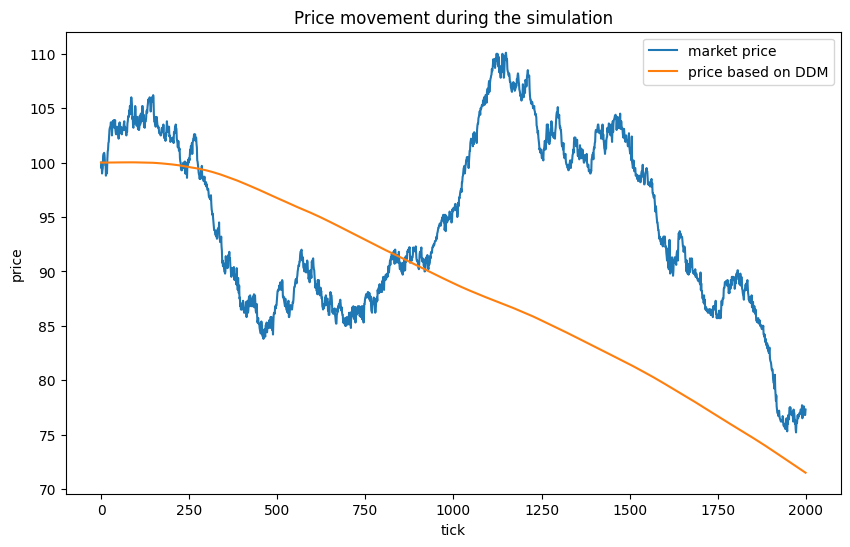

In [63]:
plt.figure(figsize =(10, 6))
plt.plot(info.prices[0], label = 'market price')
plt.plot((np.cumsum(info.dividends[0]) + 100) / np.power(1 +info.exchanges[0].risk_free_rate, np.arange(len(info.dividends[0])) + 1), label = 'price based on DDM')
plt.title('Price movement during the simulation')
plt.xlabel('tick')
plt.ylabel('price')
plt.legend()
plt.show()


  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 2 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


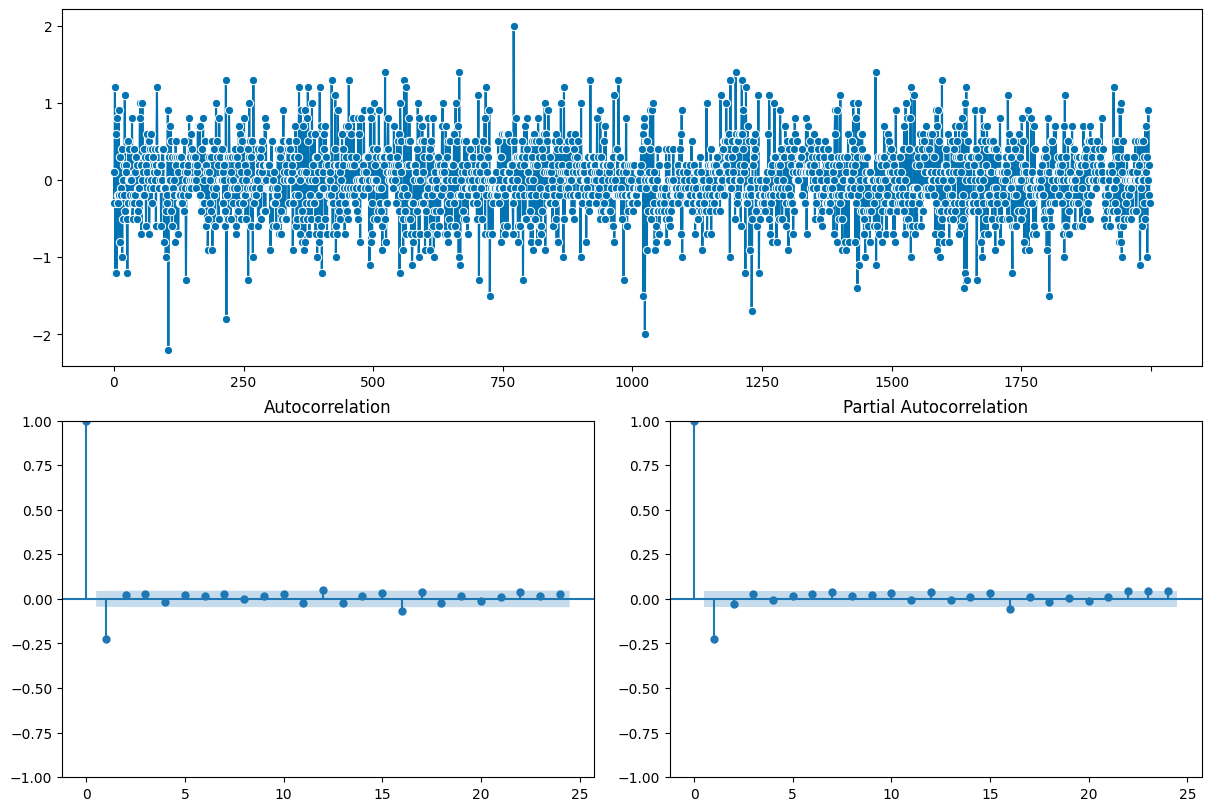

In [28]:
print(' ', '>' * 55, 'Pic. 2', '<' * 55)
plot_correlations_returns(info)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 3 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


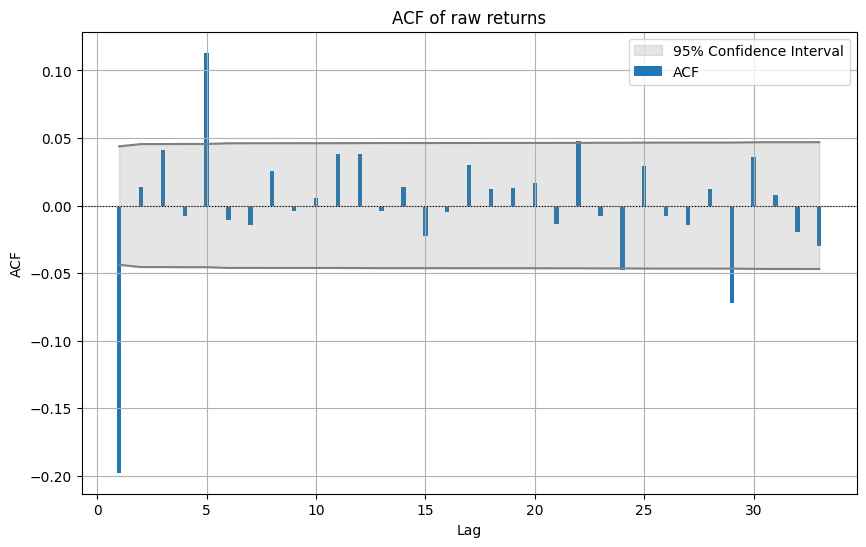

In [11]:
print(' ', '>' * 55, 'Pic. 3', '<' * 55)
plot_raw_returns_autocorrelation(info)

There's no long-term autocorrelation in raw returns, it significantly correlates only with it's previous value

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 4 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


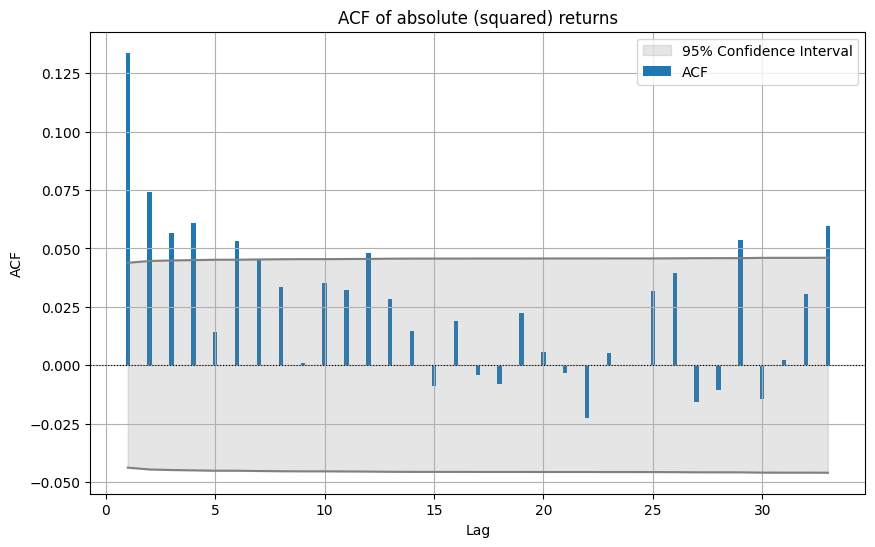

In [10]:
print(' ', '>' * 55, 'Pic. 4', '<' * 55)
plot_absolute_returns_autocorrelation(info)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 5.1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


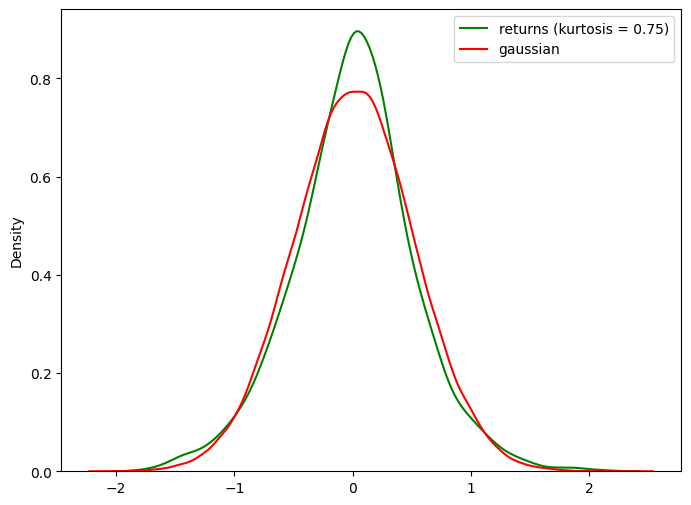

In [12]:
print(' ', '>' * 55, 'Pic. 5.1', '<' * 55)
plot_returns_density(info)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 5.2 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


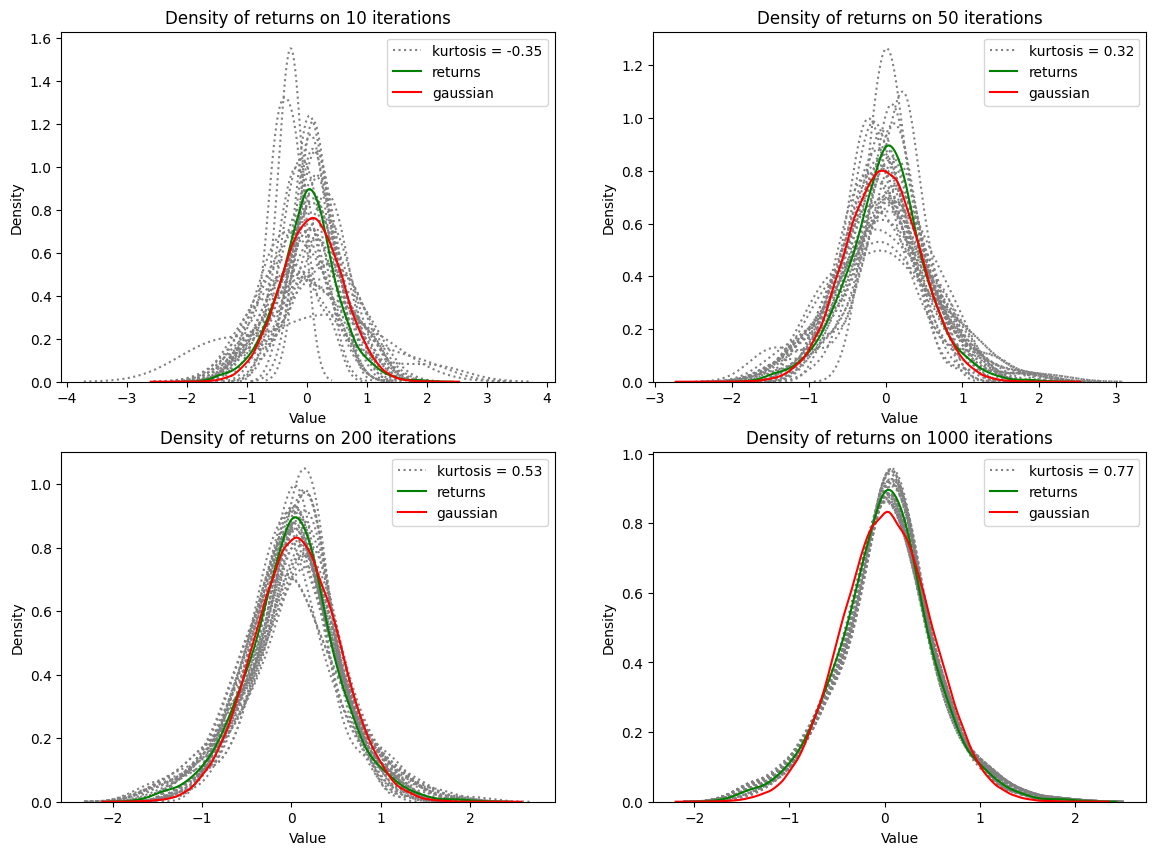

In [14]:
print(' ', '>' * 55, 'Pic. 5.2', '<' * 55)
plot_returns_density_window(info)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 6 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


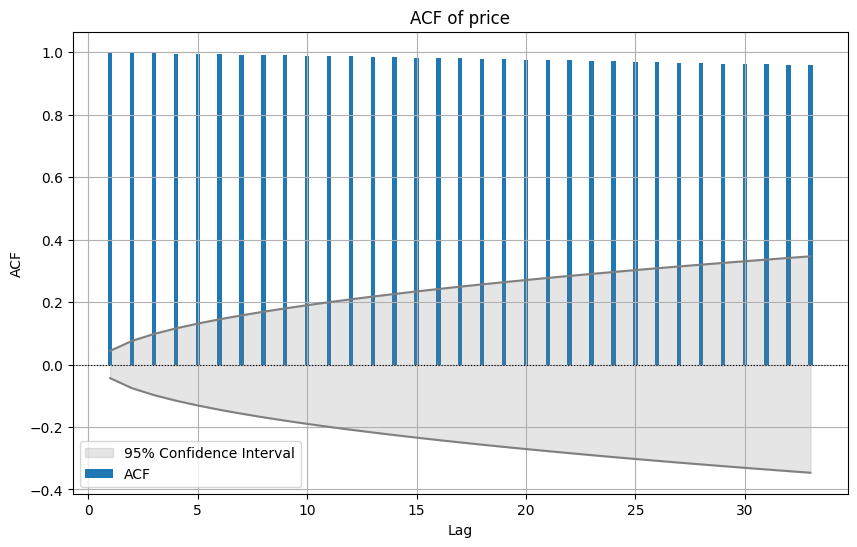

In [15]:
print(' ', '>' * 55, 'Pic. 6', '<' * 55)
plot_price_autocorrelation(info)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 7 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


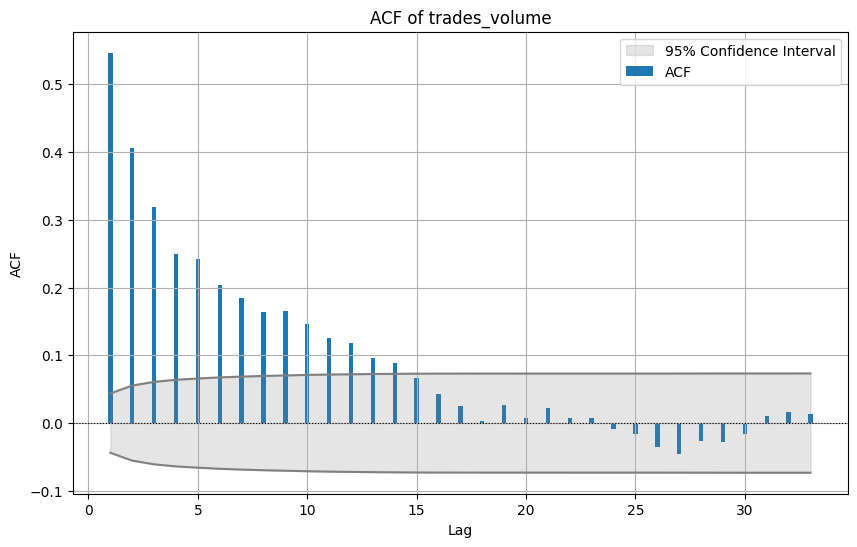

In [16]:
print(' ', '>' * 55, 'Pic. 7', '<' * 55)
plot_trade_volume_autocorrelation(info)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 8 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


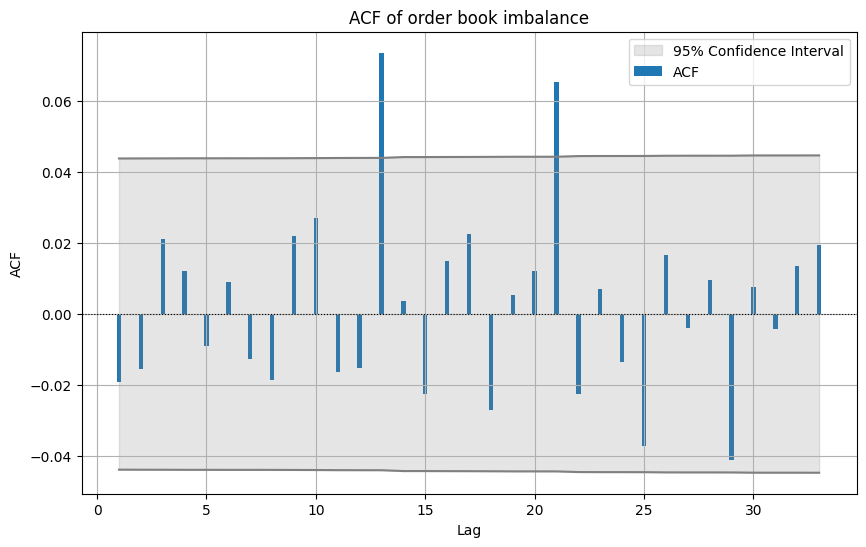

In [18]:
print(' ', '>' * 55, 'Pic. 8', '<' * 55)
plot_orderbook_imbalance_atocorrelation(info)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 9 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


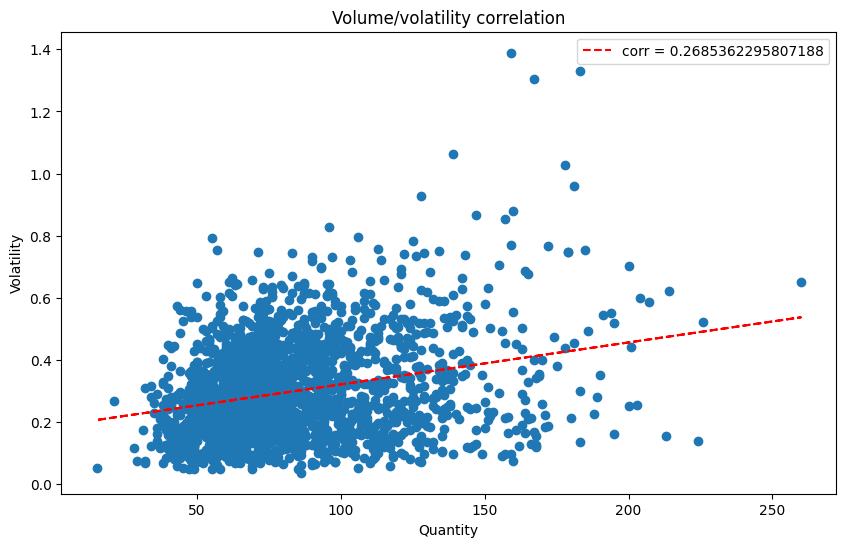

In [19]:
print(' ', '>' * 55, 'Pic. 9', '<' * 55)
plot_volume_volatility_correlation(info)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 10 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


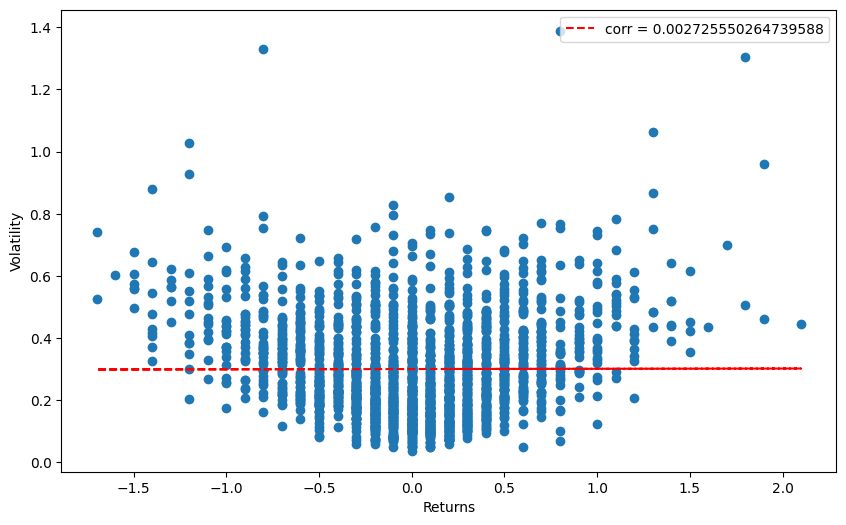

In [20]:
print(' ', '>' * 55, 'Pic. 10', '<' * 55)
plot_raw_returns_volatility_correlation(info)

  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Pic. 11 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


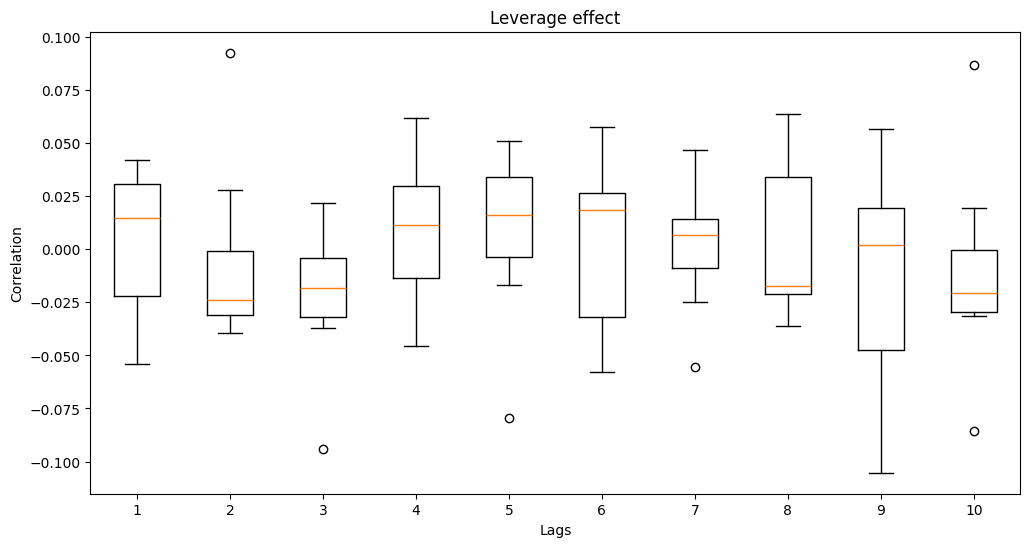

In [22]:
print(' ', '>' * 55, 'Pic. 11', '<' * 55)
plot_leverage_effect(infos)

### Results: